<ipython-input-1-4d526d95be17>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Greys')


TypeError: Input z must be 2D, not 1D

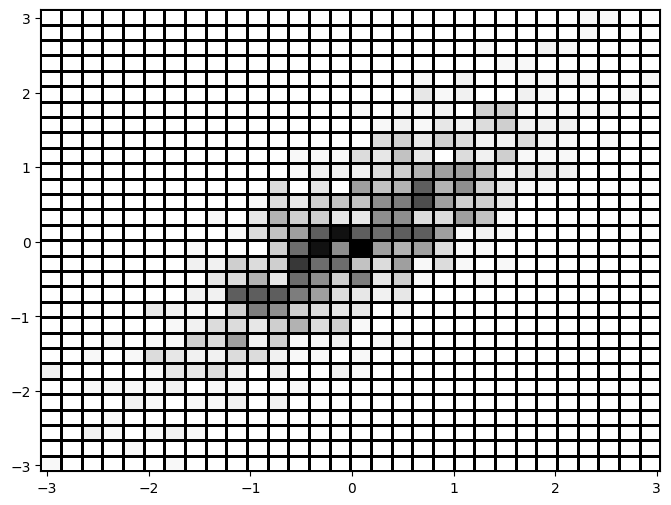

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Gaussian distribution
mean1, mean2 = 0, 0
stddev1, stddev2 = 1, 1
rho = 0.8  # correlation coefficient

# Generate random Gaussian data
np.random.seed(0)
size = 1000
cov = np.array([[stddev1**2, rho * stddev1 * stddev2],
                [rho * stddev1 * stddev2, stddev2**2]])
data = np.random.multivariate_normal([mean1, mean2], cov, size)

# Create a joint histogram
plt.figure(figsize=(8, 6))
plt.hist2d(data[:, 0], data[:, 1], bins=30, cmap='Greys', edgecolors='black')

# Add black dotted contours
from matplotlib.colors import Normalize
from matplotlib import cm

# Get the current colormap
cmap = cm.get_cmap('Greys')
norm = Normalize(vmin=0, vmax=np.max(np.histogram2d(data[:, 0], data[:, 1], bins=30)[0]))

# Plot contours
plt.contour(data[:, 0], data[:, 1], levels=10, colors='black', linestyles='dotted')

# Label the axes
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Joint Gaussian Histogram with Black and Dotted Contours')

plt.show()


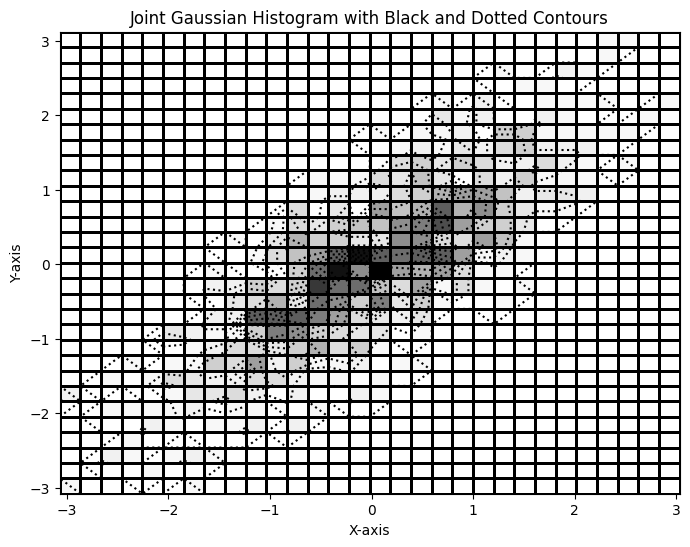

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

# Parameters for the Gaussian distribution
mean1, mean2 = 0, 0
stddev1, stddev2 = 1, 1
rho = 0.8  # correlation coefficient

# Generate random Gaussian data
np.random.seed(0)
size = 1000
cov = np.array([[stddev1**2, rho * stddev1 * stddev2],
                [rho * stddev1 * stddev2, stddev2**2]])
data = np.random.multivariate_normal([mean1, mean2], cov, size)

# Create a joint histogram
plt.figure(figsize=(8, 6))
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], bins=30, density=True)

# Create a meshgrid for contour plotting
xpos, ypos = np.meshgrid(xedges[:-1] + (xedges[1] - xedges[0]) / 2,
                         yedges[:-1] + (yedges[1] - yedges[0]) / 2, indexing='ij')
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)

# Plot histogram as a color plot
plt.pcolormesh(xedges, yedges, hist.T, shading='auto', cmap='Greys', edgecolors='black')

# Add black dotted contours
plt.contour(xedges[:-1], yedges[:-1], hist.T, levels=10, colors='black', linestyles='dotted')

# Label the axes
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Joint Gaussian Histogram with Black and Dotted Contours')

plt.show()


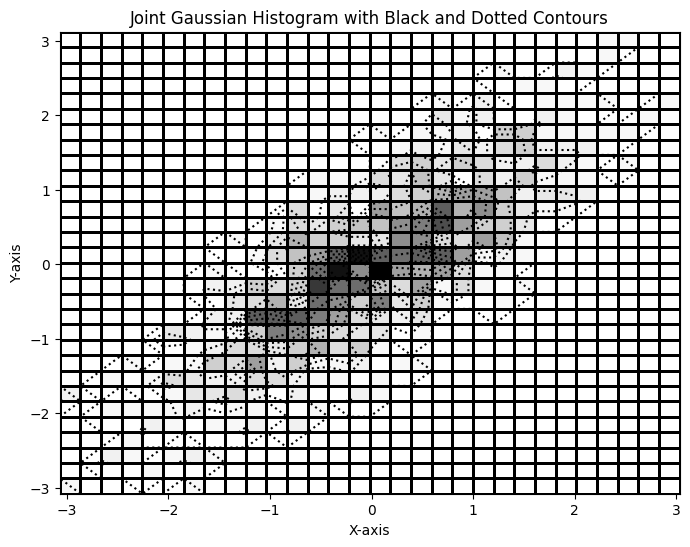

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

# Parameters for the Gaussian distribution
mean1, mean2 = 0, 0
stddev1, stddev2 = 1, 1
rho = 0.8  # correlation coefficient

# Generate random Gaussian data
np.random.seed(0)
size = 1000
cov = np.array([[stddev1**2, rho * stddev1 * stddev2],
                [rho * stddev1 * stddev2, stddev2**2]])
data = np.random.multivariate_normal([mean1, mean2], cov, size)

# Create a joint histogram
plt.figure(figsize=(8, 6))
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], bins=30, density=True)

# Create a meshgrid for contour plotting
xpos, ypos = np.meshgrid(xedges[:-1] + (xedges[1] - xedges[0]) / 2,
                         yedges[:-1] + (yedges[1] - yedges[0]) / 2, indexing='ij')
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)

# Plot histogram as a color plot
plt.pcolormesh(xedges, yedges, hist.T, shading='auto', cmap='Greys', edgecolors='black')

# Add black dotted contours
plt.contour(xedges[:-1], yedges[:-1], hist.T, levels=10, colors='black', linestyles='dotted')

# Label the axes
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Joint Gaussian Histogram with Black and Dotted Contours')

plt.show()


Optimal Parameters:
Length Scale (l): 4.6415888336127775
Noise Variance (sigma_n^2): 0.046415888336127774
Best Log-Likelihood: 655.8196038870323


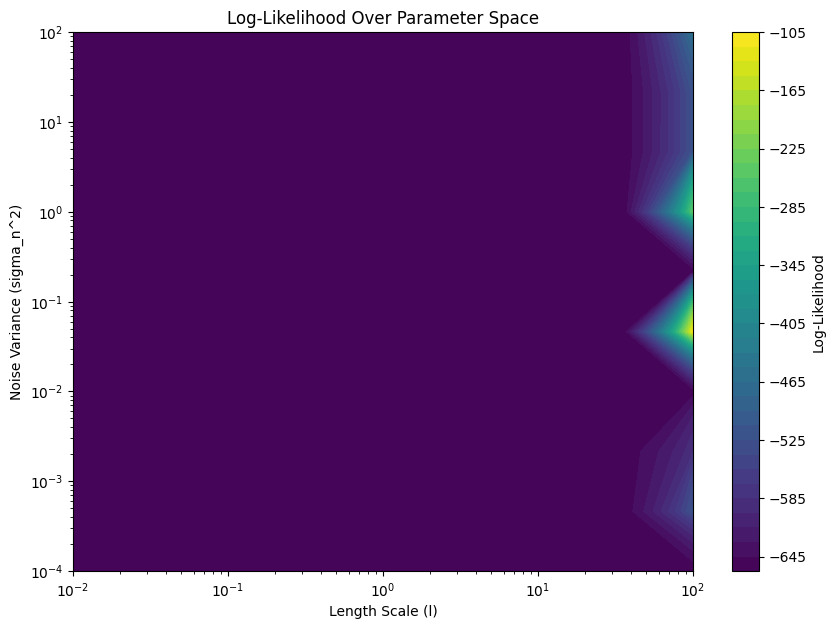

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from scipy.optimize import minimize

# Kernel function: Squared Exponential Kernel (RBF Kernel)
def rbf_kernel(x, x_prime, l):
    sqdist = np.sum((x[:, np.newaxis] - x_prime[np.newaxis, :])**2, axis=2)
    return np.exp(-0.5 * sqdist / l**2)

# Log-Likelihood Function
def log_likelihood(params, X_train, y_train):
    l, sigma_n = params
    K = rbf_kernel(X_train, X_train, l) + sigma_n**2 * np.eye(len(X_train))
    L = np.linalg.cholesky(K)
    alpha = np.linalg.solve(L.T, np.linalg.solve(L, y_train))
    log_likelihood = -0.5 * np.dot(y_train, alpha) - np.sum(np.log(np.diagonal(L))) - len(X_train) / 2 * np.log(2 * np.pi)
    return -log_likelihood  # We minimize, so return negative log-likelihood

# Cross-Validation Function
def cross_validate(X, y, l_values, sigma_n_values, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    best_log_likelihood = -np.inf
    best_params = None

    for l in l_values:
        for sigma_n in sigma_n_values:
            log_likelihoods = []
            for train_index, test_index in kf.split(X):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]

                result = minimize(log_likelihood, [l, sigma_n], args=(X_train, y_train), method='L-BFGS-B', bounds=[(1e-4, 1e2), (1e-4, 1e2)])
                log_likelihood_value = -result.fun

                log_likelihoods.append(log_likelihood_value)

            avg_log_likelihood = np.mean(log_likelihoods)
            if avg_log_likelihood > best_log_likelihood:
                best_log_likelihood = avg_log_likelihood
                best_params = (l, sigma_n)

    return best_params, best_log_likelihood

# Synthetic Data Preparation
np.random.seed(0)
n_samples = 100
X = np.random.rand(n_samples, 2)
u = np.sin(X[:, 0]) + np.cos(X[:, 1])
v = np.sin(X[:, 1]) + np.cos(X[:, 0])
y = np.concatenate([u, v])

# Define search space
l_values = np.logspace(-2, 2, 10)  # Length scale values
sigma_n_values = np.logspace(-4, 2, 10)  # Noise variance values

# Perform cross-validation
best_params, best_log_likelihood = cross_validate(X, y, l_values, sigma_n_values)

print("Optimal Parameters:")
print(f"Length Scale (l): {best_params[0]}")
print(f"Noise Variance (sigma_n^2): {best_params[1]}")
print(f"Best Log-Likelihood: {best_log_likelihood}")

# Plot the log-likelihood over the search space
def plot_log_likelihood_surface(l_values, sigma_n_values, log_likelihoods):
    L, S = np.meshgrid(l_values, sigma_n_values, indexing='ij')
    plt.figure(figsize=(10, 7))
    plt.contourf(L, S, log_likelihoods, levels=50, cmap='viridis')
    plt.colorbar(label='Log-Likelihood')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Length Scale (l)')
    plt.ylabel('Noise Variance (sigma_n^2)')
    plt.title('Log-Likelihood Over Parameter Space')
    plt.show()

# Calculate log-likelihood for each parameter combination
log_likelihoods = np.zeros((len(l_values), len(sigma_n_values)))
for i, l in enumerate(l_values):
    for j, sigma_n in enumerate(sigma_n_values):
        log_likelihood_value = -cross_validate(X, y, [l], [sigma_n])[1]
        log_likelihoods[i, j] = log_likelihood_value

plot_log_likelihood_surface(l_values, sigma_n_values, log_likelihoods)


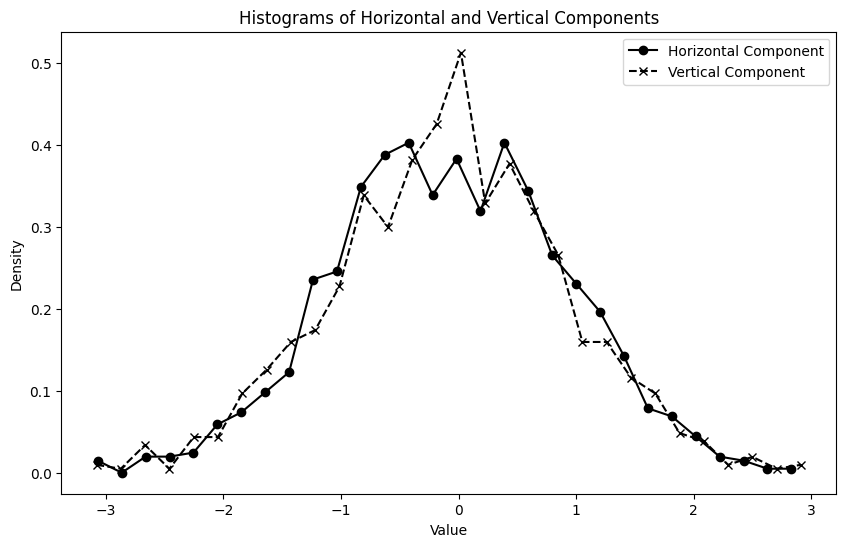

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Gaussian distribution
mean1, mean2 = 0, 0
stddev1, stddev2 = 1, 1
rho = 0.8  # correlation coefficient

# Generate random Gaussian data
np.random.seed(0)
size = 1000
cov = np.array([[stddev1**2, rho * stddev1 * stddev2],
                [rho * stddev1 * stddev2, stddev2**2]])
data = np.random.multivariate_normal([mean1, mean2], cov, size)

# Extract horizontal and vertical components
x_data = data[:, 0]
y_data = data[:, 1]

# Compute histograms
x_hist, x_edges = np.histogram(x_data, bins=30, density=True)
y_hist, y_edges = np.histogram(y_data, bins=30, density=True)

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot horizontal histogram
plt.plot(x_edges[:-1], x_hist, color='black', linestyle='-', marker='o', label='Horizontal Component')

# Plot vertical histogram
plt.plot(y_edges[:-1], y_hist, color='black', linestyle='--', marker='x', label='Vertical Component')

# Labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histograms of Horizontal and Vertical Components')
plt.legend()

# Show plot
plt.show()

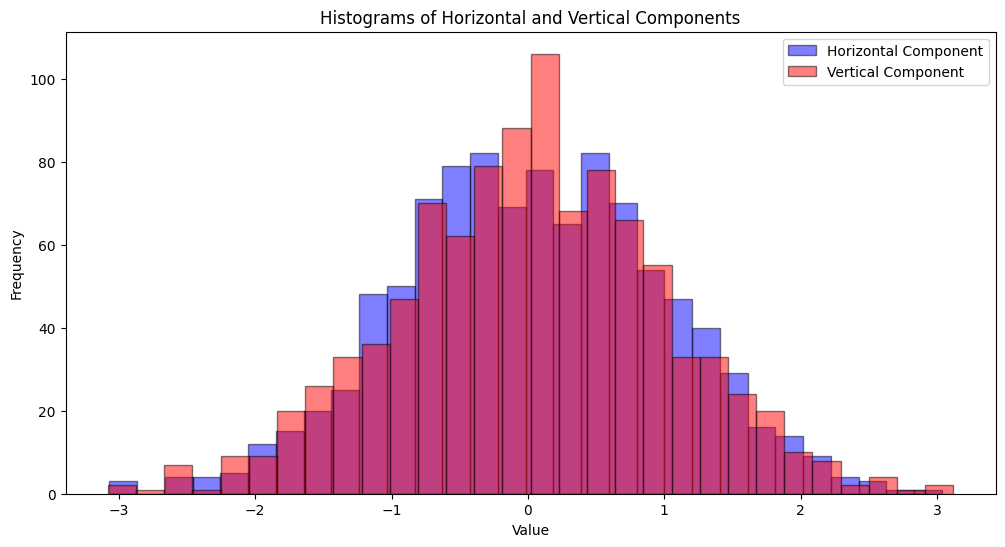

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Gaussian distribution
mean1, mean2 = 0, 0
stddev1, stddev2 = 1, 1
rho = 0.8  # correlation coefficient

# Generate random Gaussian data
np.random.seed(0)
size = 1000
cov = np.array([[stddev1**2, rho * stddev1 * stddev2],
                [rho * stddev1 * stddev2, stddev2**2]])
data = np.random.multivariate_normal([mean1, mean2], cov, size)

# Extract horizontal and vertical components
x_data = data[:, 0]
y_data = data[:, 1]

# Create figure and axis
plt.figure(figsize=(12, 6))

# Plot histogram for horizontal component
plt.hist(x_data, bins=30, alpha=0.5, color='blue', edgecolor='black', label='Horizontal Component')

# Plot histogram for vertical component
plt.hist(y_data, bins=30, alpha=0.5, color='red', edgecolor='black', label='Vertical Component')

# Labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Horizontal and Vertical Components')
plt.legend()

# Show plot
plt.show()


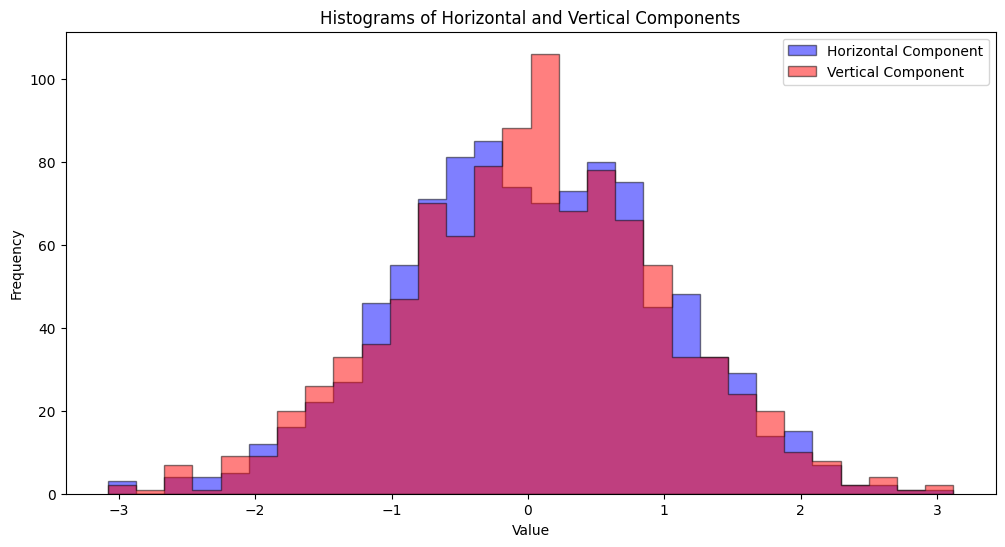

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Gaussian distribution
mean1, mean2 = 0, 0
stddev1, stddev2 = 1, 1
rho = 0.8  # correlation coefficient

# Generate random Gaussian data
np.random.seed(0)
size = 1000
cov = np.array([[stddev1**2, rho * stddev1 * stddev2],
                [rho * stddev1 * stddev2, stddev2**2]])
data = np.random.multivariate_normal([mean1, mean2], cov, size)

# Extract horizontal and vertical components
x_data = data[:, 0]
y_data = data[:, 1]

# Create figure and axis
plt.figure(figsize=(12, 6))

# Compute histogram bin edges for consistent binning
bins = np.linspace(min(min(x_data), min(y_data)), max(max(x_data), max(y_data)), 31)

# Plot histogram for horizontal component
plt.hist(x_data, bins=bins, alpha=0.5, color='blue', edgecolor='black', label='Horizontal Component', histtype='stepfilled')

# Plot histogram for vertical component
plt.hist(y_data, bins=bins, alpha=0.5, color='red', edgecolor='black', label='Vertical Component', histtype='stepfilled')

# Labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Horizontal and Vertical Components')
plt.legend()

# Show plot
plt.show()



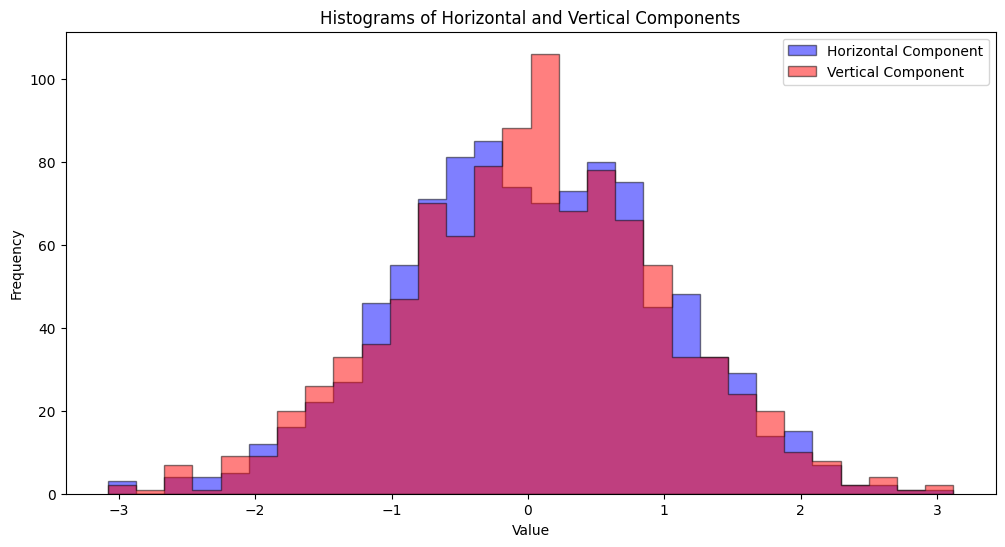

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Gaussian distribution
mean1, mean2 = 0, 0
stddev1, stddev2 = 1, 1
rho = 0.8  # correlation coefficient

# Generate random Gaussian data
np.random.seed(0)
size = 1000
cov = np.array([[stddev1**2, rho * stddev1 * stddev2],
                [rho * stddev1 * stddev2, stddev2**2]])
data = np.random.multivariate_normal([mean1, mean2], cov, size)

# Extract horizontal and vertical components
x_data = data[:, 0]
y_data = data[:, 1]

# Create figure and axis
plt.figure(figsize=(12, 6))

# Compute histogram bin edges for consistent binning
bins = np.linspace(min(min(x_data), min(y_data)), max(max(x_data), max(y_data)), 31)

# Plot histogram for horizontal component
plt.hist(x_data, bins=bins, alpha=0.5, color='blue', edgecolor='black', label='Horizontal Component', histtype='stepfilled')

# Plot histogram for vertical component
plt.hist(y_data, bins=bins, alpha=0.5, color='red', edgecolor='black', label='Vertical Component', histtype='stepfilled')

# Labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Horizontal and Vertical Components')
plt.legend()

# Show plot
plt.show()


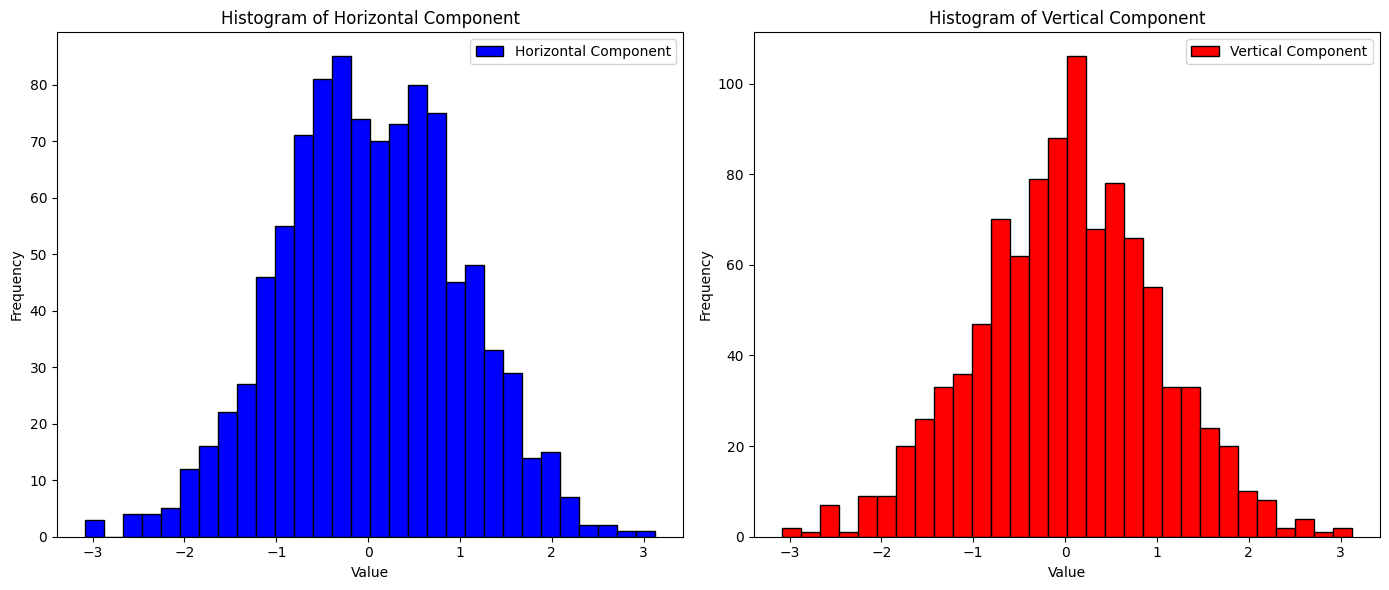

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Gaussian distribution
mean1, mean2 = 0, 0
stddev1, stddev2 = 1, 1
rho = 0.8  # correlation coefficient

# Generate random Gaussian data
np.random.seed(0)
size = 1000
cov = np.array([[stddev1**2, rho * stddev1 * stddev2],
                [rho * stddev1 * stddev2, stddev2**2]])
data = np.random.multivariate_normal([mean1, mean2], cov, size)

# Extract horizontal and vertical components
x_data = data[:, 0]
y_data = data[:, 1]

# Create figure and axis
plt.figure(figsize=(14, 6))

# Compute histogram bin edges for consistent binning
bins = np.linspace(min(min(x_data), min(y_data)), max(max(x_data), max(y_data)), 31)

# Plot histogram for horizontal component in the first subplot
plt.subplot(1, 2, 1)
plt.hist(x_data, bins=bins, color='blue', edgecolor='black', label='Horizontal Component')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Horizontal Component')
plt.legend()

# Plot histogram for vertical component in the second subplot
plt.subplot(1, 2, 2)
plt.hist(y_data, bins=bins, color='red', edgecolor='black', label='Vertical Component')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Vertical Component')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


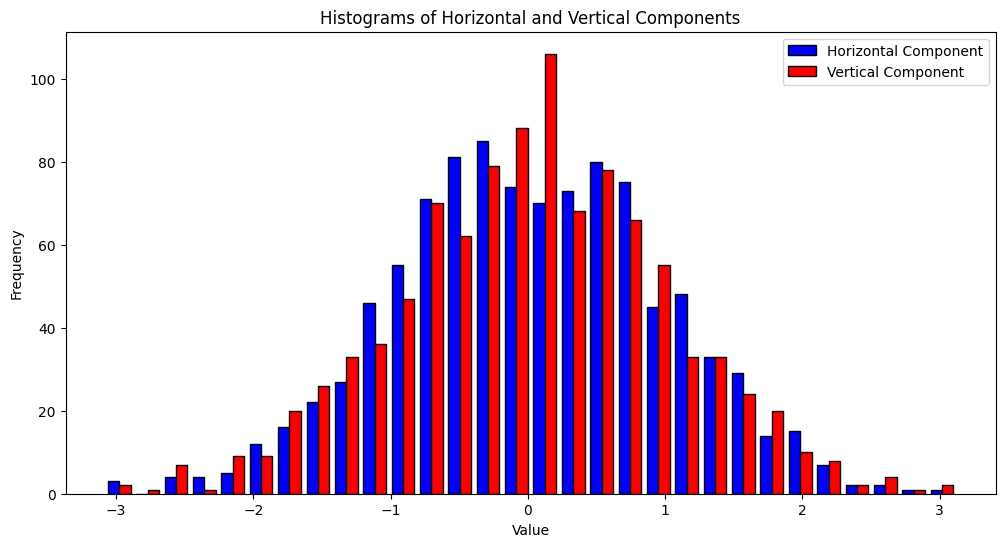

In [11]:
# prompt: good, now put them on the same axis, using 2 bars in each bin

import matplotlib.pyplot as plt
import numpy as np
# Parameters for the Gaussian distribution
mean1, mean2 = 0, 0
stddev1, stddev2 = 1, 1
rho = 0.8  # correlation coefficient

# Generate random Gaussian data
np.random.seed(0)
size = 1000
cov = np.array([[stddev1**2, rho * stddev1 * stddev2],
                [rho * stddev1 * stddev2, stddev2**2]])
data = np.random.multivariate_normal([mean1, mean2], cov, size)

# Extract horizontal and vertical components
x_data = data[:, 0]
y_data = data[:, 1]

# Create figure and axis
plt.figure(figsize=(12, 6))

# Compute histogram bin edges for consistent binning
bins = np.linspace(min(min(x_data), min(y_data)), max(max(x_data), max(y_data)), 31)

# Plot histograms for horizontal and vertical components on the same axis
plt.hist([x_data, y_data], bins=bins, color=['blue', 'red'], edgecolor='black', label=['Horizontal Component', 'Vertical Component'])

# Labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Horizontal and Vertical Components')
plt.legend()

# Show plot
plt.show()


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mean = np.array([300, 1050])  # Mean location in km
variances = [1000, 5000, 10000]  # Different variances to test
num_particles = 100
total_hours = 120
time_step = 0.1
num_steps = int(total_hours / time_step)
width, height = 1000, 2000  # Dimensions of the grid for plotting

# Generate synthetic velocity field (for demonstration)
def generate_velocity_field(width, height):
    x, y = np.meshgrid(np.arange(width), np.arange(height))
    u = np.sin(y / 100.0)  # Example velocity field
    v = np.cos(x / 100.0)
    return u, v

# Initialize particles from a Gaussian distribution
def initialize_particles(num_particles, mean, variance, width, height):
    covariance = np.array([[variance, 0], [0, variance]])
    particles = np.random.multivariate_normal(mean, covariance, num_particles)
    return np.clip(particles, 0, [width, height])

# Update particle positions
def update_positions(positions, u, v, width, height, delta_t):
    new_positions = np.copy(positions)
    for i in range(len(positions)):
        x, y = positions[i]
        x = np.clip(int(x), 0, width-1)
        y = np.clip(int(y), 0, height-1)
        new_positions[i, 0] += u[y, x] * delta_t
        new_positions[i, 1] += v[y, x] * delta_t
        new_positions[i] = np.clip(new_positions[i], 0, [width-1, height-1])
    return new_positions

# Plotting function
def plot_particle_positions(particles, time, title, filename):
    plt.figure(figsize=(10, 6))
    plt.scatter(particles[:, 0], particles[:, 1], c=np.random.rand(num_particles, 3), s=10)
    plt.title(title)
    plt.xlim(0, width)
    plt.ylim(0, height)
    plt.xlabel('X Position (km)')
    plt.ylabel('Y Position (km)')
    plt.grid(True)

    # Print the filename before saving to check if the path is correct
    print("Saving figure to:", filename.png)
    plt.savefig(filename)
    plt.close()

# Parameters for the simulation
num_particles = 100
initial_positions = np.random.uniform(low=[0, 0], high=[1000, 2000], size=(num_particles, 2))  # Example map size
time_steps = len(new_time_points)
delta_t = 1  # 1 day

# Initialize particles
particles = np.copy(initial_positions)

# Function to update particle positions
def update_positions(particles, flow_x, flow_y, delta_t): # The function expects 4 arguments
    new_particles = np.copy(particles)
    for i in range(num_particles):
        x, y = particles[i]
        x_idx = int(x)
        y_idx = int(y)
        if 0 <= x_idx < len(flow_x) and 0 <= y_idx < len(flow_y):
            new_particles[i, 0] += flow_x[x_idx] * delta_t
            new_particles[i, 1] += flow_y[y_idx] * delta_t
            new_particles[i] = np.clip(new_particles[i], 0, [1000, 2000])  # Keep within bounds
    return new_particles

# Main simulation function (modified)
def simulate_and_plot(variances):
    u, v = generate_velocity_field(width, height)
    for variance in variances:
        particles = initialize_particles(num_particles, mean, variance, width, height)
        for step in range(num_steps):
            particles = update_positions(particles, u, v, time_step)

            if step == int(48 / time_step):
                plot_particle_positions(particles, 48, f'Variance {variance}: 48 hours', f'particles_variance{variance}_48h.png')
            if step == int(72 / time_step):
                plot_particle_positions(particles, 72, f'Variance {variance}: 72 hours', f'particles_variance{variance}_72h.png')
            if step == int(120 / time_step):
                plot_particle_positions(particles, 120, f'Variance {variance}: 120 hours', f'particles_variance{variance}_120h.png')

# Run the simulation
simulate_and_plot(variances)

ValueError: setting an array element with a sequence.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mean = np.array([300, 1050])  # Mean location in km
variances = [1000, 5000, 10000]  # Different variances to test
num_particles = 100
total_hours = 120
time_step = 0.1
num_steps = int(total_hours / time_step)
width, height = 1000, 2000  # Dimensions of the grid for plotting

# Generate synthetic velocity field (for demonstration)
def generate_velocity_field(width, height):
    x, y = np.meshgrid(np.arange(width), np.arange(height))
    u = np.sin(y / 100.0)  # Example velocity field
    v = np.cos(x / 100.0)
    return u, v

# Initialize particles from a Gaussian distribution
def initialize_particles(num_particles, mean, variance, width, height):
    covariance = np.array([[variance, 0], [0, variance]])
    particles = np.random.multivariate_normal(mean, covariance, num_particles)
    return np.clip(particles, 0, [width, height])

# Update particle positions
def update_positions(positions, u, v, width, height, delta_t):
    new_positions = np.copy(positions)
    for i in range(len(positions)):
        x, y = positions[i]
        x = np.clip(int(x), 0, width-1)
        y = np.clip(int(y), 0, height-1)
        new_positions[i, 0] += u[y, x] * delta_t
        new_positions[i, 1] += v[y, x] * delta_t
        new_positions[i] = np.clip(new_positions[i], 0, [width-1, height-1])
    return new_positions

# Plotting function
def plot_particle_positions(particles, time, title, filename):
    plt.figure(figsize=(10, 6))
    plt.scatter(particles[:, 0], particles[:, 1], c=np.random.rand(num_particles, 3), s=10)
    plt.title(title)
    plt.xlim(0, width)
    plt.ylim(0, height)
    plt.xlabel('X Position (km)')
    plt.ylabel('Y Position (km)')
    plt.grid(True)

    # Print the filename before saving to check if the path is correct
    print("Saving figure to:", filename)
    plt.savefig(filename)
    plt.close()

# Parameters for the simulation
num_particles = 100
initial_positions = np.random.uniform(low=[0, 0], high=[1000, 2000], size=(num_particles, 2))  # Example map size
time_steps = 1200 # Assuming you want to simulate for 1200 time steps
delta_t = 1  # 1 day

# Initialize particles
particles = np.copy(initial_positions)

# Function to update particle positions
def update_positions(particles, flow_x, flow_y, delta_t):
    new_particles = np.copy(particles)
    for i in range(num_particles):
        x, y = particles[i]
        x_idx = int(x)
        y_idx = int(y)
        # Ensure indices are within the bounds of flow_x and flow_y
        if 0 <= x_idx < flow_x.shape[0] and 0 <= y_idx < flow_y.shape[1]:
            # Access the flow values at the correct indices
            new_particles[i, 0] += flow_x[y_idx, x_

SyntaxError: incomplete input (<ipython-input-25-4f7ddb6dd2d3>, line 73)

In [18]:
# prompt: please generate the images as above

!apt-get install imagemagick
!convert -delay 100 -loop 0 particles_variance1000_*.png particles_variance1000.gif
!convert -delay 100 -loop 0 particles_variance5000_*.png particles_variance5000.gif
!convert -delay 100 -loop 0 particles_variance10000_*.png particles_variance10000.gif


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
imagemagick is already the newest version (8:6.9.11.60+dfsg-1.3ubuntu0.22.04.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [19]:
# prompt: save them to my computer as .png files

from google.colab import files
files.download('particles_variance1000_48h.png')
files.download('particles_variance1000_72h.png')
files.download('particles_variance1000_120h.png')
files.download('particles_variance5000_48h.png')
files.download('particles_variance5000_72h.png')
files.download('particles_variance5000_120h.png')
files.download('particles_variance10000_48h.png')
files.download('particles_variance10000_72h.png')
files.download('particles_variance10000_120h.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FileNotFoundError: Cannot find file: particles_variance1000_120h.png

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Example flow data (time in days, flow in x and y directions)
time_points = np.array([0, 3, 6, 9, 12])  # in days
flow_x = np.array([0, 1, 0, -1, 0])  # example flow in x direction
flow_y = np.array([0, 1, 2, 1, 0])  # example flow in y direction

# Convert time points to days for interpolation
time_points_days = time_points

# Define the kernel function: Constant * RBF
kernel = C(1.0) * RBF(length_scale=1.0)

# Create Gaussian Process models for x and y directions
gp_x = GaussianProcessRegressor(kernel=kernel, alpha=1e-2)
gp_y = GaussianProcessRegressor(kernel=kernel, alpha=1e-2)

# Fit the models to the data
gp_x.fit(time_points_days[:, np.newaxis], flow_x)
gp_y.fit(time_points_days[:, np.newaxis], flow_y)

# Define new time points for interpolation
new_time_points = np.arange(0, 365, 1)  # Simulate for one year with daily steps

# Predict flow at new time points
flow_x_pred, _ = gp_x.predict(new_time_points[:, np.newaxis], return_std=True)
flow_y_pred, _ = gp_y.predict(new_time_points[:, np.newaxis], return_std=True)


In [21]:
# Parameters for the simulation
num_particles = 100
initial_positions = np.random.uniform(low=[0, 0], high=[1000, 2000], size=(num_particles, 2))  # Example map size
time_steps = len(new_time_points)
delta_t = 1  # 1 day

# Initialize particles
particles = np.copy(initial_positions)

# Function to update particle positions
def update_positions(particles, flow_x, flow_y, delta_t):
    new_particles = np.copy(particles)
    for i in range(num_particles):
        x, y = particles[i]
        x_idx = int(x)
        y_idx = int(y)
        if 0 <= x_idx < len(flow_x) and 0 <= y_idx < len(flow_y):
            new_particles[i, 0] += flow_x[x_idx] * delta_t
            new_particles[i, 1] += flow_y[y_idx] * delta_t
            new_particles[i] = np.clip(new_particles[i], 0, [1000, 2000])  # Keep within bounds
    return new_particles

# Simulate particle movement
for t in range(time_steps):
    particles = update_positions(particles, flow_x_pred, flow_y_pred, delta_t)
    if t in [48, 72, 120]:
        plt.figure(figsize=(10, 6))
        plt.scatter(particles[:, 0], particles[:, 1], c=np.random.rand(num_particles, 3), s=10)
        plt.title(f'Particle Positions at Day {t}')
        plt.xlabel('X Position')
        plt.ylabel('Y Position')
        plt.grid(True)
        plt.savefig(f'particles_day_{t}.png')
        plt.close()


In [22]:
# prompt: where is the animation for above?

!apt-get install imagemagick
!convert -delay 100 -loop 0 particles_variance*.png particles_variance.gif
files.download('particles_variance.gif')


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
imagemagick is already the newest version (8:6.9.11.60+dfsg-1.3ubuntu0.22.04.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# prompt: these scripts have successfully made plots for 48hrs and 72 hrs, yet the 120hrs is missing, repeat process for 120hr

import matplotlib.pyplot as plt
import numpy as np
# Parameters
mean = np.array([300, 1050])  # Mean location in km
variances = [1000, 5000, 10000]  # Different variances to test
num_particles = 100
total_hours = 120
time_step = 0.1
num_steps = int(total_hours / time_step)
width, height = 1000, 2000  # Dimensions of the grid for plotting

# ... (rest of the functions: generate_velocity_field, initialize_particles, update_positions remain the same)

# Plotting function (modified)
def plot_particle_positions(particles, time, title, filename):
    plt.figure(figsize=(10, 6))
    plt.scatter(particles[:, 0], particles[:, 1], c=np.random.rand(num_particles, 3), s=10)
    plt.title(title)
    plt.xlim(0, width)
    plt.ylim(0, height)
    plt.xlabel('X Position (km)')
    plt.ylabel('Y Position (km)')
    plt.grid(True)
    plt.savefig(filename)
    plt.close()

# Main simulation function (modified)
def simulate_and_plot(variances):
    u, v = generate_velocity_field(width, height)
    for variance in variances:
        particles = initialize_particles(num_particles, mean, variance, width, height)
        for step in range(num_steps):
            particles = update_positions(particles, u, v, width, height, time_step)

            if step == int(48 / time_step):
                plot_particle_positions(particles, 48, f'Variance {variance}: 48 hours', f'particles_variance{variance}_48h.png')
            if step == int(72 / time_step):
                plot_particle_positions(particles, 72, f'Variance {variance}: 72 hours', f'particles_variance{variance}_72h.png')
            if step == int(120 / time_step):  # Plot for 120 hours
                plot_particle_positions(particles, 120, f'Variance {variance}: 120 hours', f'particles_variance{variance}_120h.png')

# Run the simulation
simulate_and_plot(variances)

!apt-get install imagemagick
!convert -delay 100 -loop 0 particles_variance1000_*.png particles_variance1000.gif
!convert -delay 100 -loop 0 particles_variance5000_*.png particles_variance5000.gif
!convert -delay 100 -loop 0 particles_variance10000_*.png particles_variance10000.gif

files.download('particles_variance1000_48h.png')
files.download('particles_variance1000_72h.png')
files.download('particles_variance1000_120h.png')
files.download('particles_variance5000_48h.png')
files.download('particles_variance5000_72h.png')
files.download('particles_variance5000_120h.png')
files.download('particles_variance10000_48h.png')
files.download('particles_variance10000_72h.png')
files.download('particles_variance10000_120h.png')


# ... (rest of the code remains the same)


TypeError: update_positions() takes 4 positional arguments but 6 were given

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Parameters for the simulation
mean = np.array([300, 1050])  # Mean location in km (center of the search area)
variances = [1000, 5000, 10000]  # Different variances to test
num_particles = 100
total_days = 365  # Simulate for one year
time_steps_per_day = 1  # Simulate for every day
num_steps = total_days * time_steps_per_day
delta_t = 1  # Time step in days
width, height = 1000, 2000  # Dimensions of the grid for plotting

# Generate synthetic flow data
def generate_flow_data():
    # Time points in days
    time_points = np.array([0, 3, 6, 9, 12])
    flow_x = np.array([0, 1, 0, -1, 0])
    flow_y = np.array([0, 1, 2, 1, 0])
    return time_points, flow_x, flow_y

def interpolate_flow(time_points, flow_x, flow_y, new_time_points):
    kernel = C(1.0) * RBF(length_scale=1.0)
    gp_x = GaussianProcessRegressor(kernel=kernel, alpha=1e-2)
    gp_y = GaussianProcessRegressor(kernel=kernel, alpha=1e-2)

    gp_x.fit(time_points[:, np.newaxis], flow_x)
    gp_y.fit(time_points[:, np.newaxis], flow_y)

    flow_x_pred, _ = gp_x.predict(new_time_points[:, np.newaxis], return_std=True)
    flow_y_pred, _ = gp_y.predict(new_time_points[:, np.newaxis], return_std=True)

    return flow_x_pred, flow_y_pred

def initialize_particles(num_particles, mean, variance, width, height):
    covariance = np.array([[variance, 0], [0, variance]])
    particles = np.random.multivariate_normal(mean, covariance, num_particles)
    return np.clip(particles, 0, [width, height])

def update_positions(particles, flow_x, flow_y, delta_t):
    new_particles = np.copy(particles)
    for i in range(num_particles):
        x, y = particles[i]
        x_idx = int(x)
        y_idx = int(y)
        if 0 <= x_idx < len(flow_x) and 0 <= y_idx < len(flow_y):
            new_particles[i, 0] += flow_x[x_idx] * delta_t
            new_particles[i, 1] += flow_y[y_idx] * delta_t
            new_particles[i] = np.clip(new_particles[i], 0, [width-1, height-1])
    return new_particles

def plot_particle_positions(particles, time, variance, title, filename):
    plt.figure(figsize=(10, 6))
    plt.scatter(particles[:, 0], particles[:, 1], c=np.random.rand(num_particles, 3), s=10)
    plt.title(title)
    plt.xlim(0, width)
    plt.ylim(0, height)
    plt.xlabel('X Position (km)')
    plt.ylabel('Y Position (km)')
    plt.grid(True)
    plt.savefig(filename)
    plt.close()

def simulate_and_plot(variances):
    time_points, flow_x, flow_y = generate_flow_data()
    new_time_points = np.arange(0, total_days, 1)  # Daily time steps for interpolation

    for variance in variances:
        particles = initialize_particles(num_particles, mean, variance, width, height)
        flow_x_pred, flow_y_pred = interpolate_flow(time_points, flow_x, flow_y, new_time_points)

        for step in range(num_steps):
            particles = update_positions(particles, flow_x_pred, flow_y_pred, delta_t)
            current_day = step + 1

            if current_day in [48, 72, 120]:
                filename = f'particles_variance{variance}_{current_day}h.png'
                plot_particle_positions(particles, current_day, variance,
                                        f'Variance {variance}: {current_day} Hours',
                                        filename)

simulate_and_plot(variances)

In [27]:
# prompt: create and download the .png files\

!apt-get install imagemagick
!convert -delay 100 -loop 0 particles_variance1000_*.png particles_variance1000.gif
!convert -delay 100 -loop 0 particles_variance5000_*.png particles_variance5000.gif
!convert -delay 100 -loop 0 particles_variance10000_*.png particles_variance10000.gif

files.download('particles_variance1000_48h.png')
files.download('particles_variance1000_72h.png')
files.download('particles_variance1000_120h.png')
files.download('particles_variance5000_48h.png')
files.download('particles_variance5000_72h.png')
files.download('particles_variance5000_120h.png')
files.download('particles_variance10000_48h.png')
files.download('particles_variance10000_72h.png')
files.download('particles_variance10000_120h.png')


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
imagemagick is already the newest version (8:6.9.11.60+dfsg-1.3ubuntu0.22.04.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

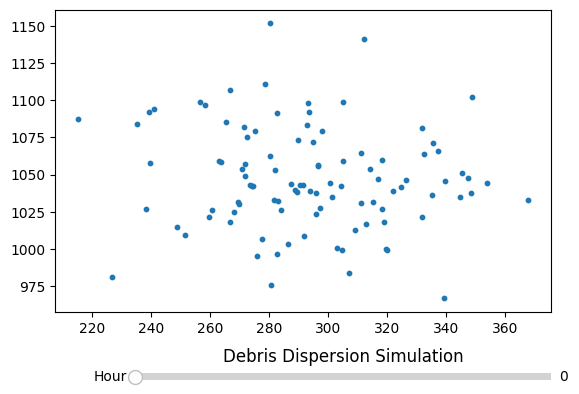

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider

# Simulation parameters
num_particles = 100
simulation_time = 125  # hours
mean = np.array([300, 1050])  # Mean location in km
variance = 1000  # Variance for particles
width, height = 1000, 2000  # Dimensions of the grid

# Generate synthetic flow data
def generate_flow_data():
    time_points = np.array([0, 3, 6, 9, 12])
    flow_x = np.array([0, 1, 0, -1, 0])
    flow_y = np.array([0, 1, 2, 1, 0])
    return time_points, flow_x, flow_y

# Interpolate flow data
def interpolate_flow(time_points, flow_x, flow_y, new_time_points):
    kernel = C(1.0) * RBF(length_scale=1.0)
    gp_x = GaussianProcessRegressor(kernel=kernel, alpha=1e-2)
    gp_y = GaussianProcessRegressor(kernel=kernel, alpha=1e-2)

    gp_x.fit(time_points[:, np.newaxis], flow_x)
    gp_y.fit(time_points[:, np.newaxis], flow_y)

    flow_x_pred, _ = gp_x.predict(new_time_points[:, np.newaxis], return_std=True)
    flow_y_pred, _ = gp_y.predict(new_time_points[:, np.newaxis], return_std=True)

    return flow_x_pred, flow_y_pred

# Initialize particles
particles = np.random.multivariate_normal(mean, np.diag([variance, variance]), num_particles)

# Generate and interpolate flow data
time_points, flow_x, flow_y = generate_flow_data()
new_time_points = np.arange(0, simulation_time + 1)  # Time points for interpolation
flow_x_pred, flow_y_pred = interpolate_flow(time_points, flow_x, flow_y, new_time_points)

# Create a figure and axes for the animation
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
scatter = ax.scatter(particles[:, 0], particles[:, 1], s=10)

# Create a slider
ax_slider = plt.axes([0.25, 0.1, 0.65, 0.03])
slider = Slider(ax_slider, 'Hour', 0, simulation_time, valinit=0, valstep=1)

# Function to update particle positions
def update_particles(t):
    if t < len(flow_x_pred):
        displacement = np.array([flow_x_pred[t], flow_y_pred[t]])
        new_positions = particles + displacement
        # Ensure particles stay within bounds
        new_positions = np.clip(new_positions, [0, 0], [width, height])
        return new_positions
    return particles

# Function to update the plot
def update(val):
    current_hour = int(slider.val)
    new_positions = update_particles(current_hour)
    scatter.set_offsets(new_positions)
    fig.canvas.draw_idle()

# Connect the slider to the update function
slider.on_changed(update)

plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Debris Dispersion Simulation")
plt.show()


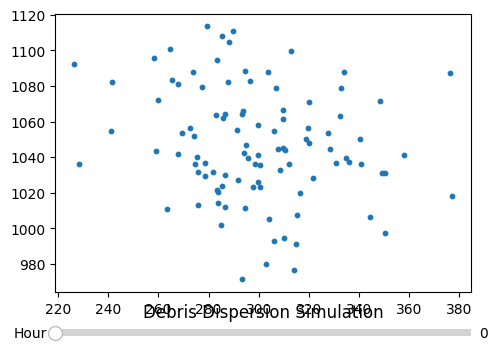

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider
from matplotlib.animation import FuncAnimation
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Simulation parameters
num_particles = 100
simulation_time = 125  # hours
mean = np.array([300, 1050])  # Mean location in km
variance = 1000  # Variance for particles
width, height = 1000, 2000  # Dimensions of the grid

# Generate synthetic flow data
def generate_flow_data():
    time_points = np.array([0, 3, 6, 9, 12])
    flow_x = np.array([0, 1, 0, -1, 0])
    flow_y = np.array([0, 1, 2, 1, 0])
    return time_points, flow_x, flow_y

# Interpolate flow data
def interpolate_flow(time_points, flow_x, flow_y, new_time_points):
    kernel = C(1.0) * RBF(length_scale=1.0)
    gp_x = GaussianProcessRegressor(kernel=kernel, alpha=1e-2)
    gp_y = GaussianProcessRegressor(kernel=kernel, alpha=1e-2)

    gp_x.fit(time_points[:, np.newaxis], flow_x)
    gp_y.fit(time_points[:, np.newaxis], flow_y)

    flow_x_pred, _ = gp_x.predict(new_time_points[:, np.newaxis], return_std=True)
    flow_y_pred, _ = gp_y.predict(new_time_points[:, np.newaxis], return_std=True)

    return flow_x_pred, flow_y_pred

# Initialize particles
particles = np.random.multivariate_normal(mean, np.diag([variance, variance]), num_particles)

# Generate and interpolate flow data
time_points, flow_x, flow_y = generate_flow_data()
new_time_points = np.arange(0, simulation_time + 1)  # Time points for interpolation
flow_x_pred, flow_y_pred = interpolate_flow(time_points, flow_x, flow_y, new_time_points)

# Create a figure and axes for the animation
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.3)
scatter = ax.scatter(particles[:, 0], particles[:, 1], s=10)

# Create a slider
ax_slider = plt.axes([0.25, 0.2, 0.65, 0.03])
slider = Slider(ax_slider, 'Hour', 0, simulation_time, valinit=0, valstep=1)

# Update the particle positions for each frame of the animation
def update_particles(t):
    if t < len(flow_x_pred):
        displacement = np.array([flow_x_pred[t], flow_y_pred[t]])
        new_positions = particles + displacement
        # Ensure particles stay within bounds
        new_positions = np.clip(new_positions, [0, 0], [width, height])
        return new_positions
    return particles

# Animation function
def animate(t):
    new_positions = update_particles(int(t))
    scatter.set_offsets(new_positions)
    return scatter,

# Update function for the slider
def update(val):
    t = slider.val
    animate(t)
    fig.canvas.draw_idle()

# Connect the slider to the update function
slider.on_changed(update)

# Set up the animation
anim = FuncAnimation(fig, animate, frames=np.arange(0, simulation_time + 1), interval=200, blit=True)

# Plot labels
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Debris Dispersion Simulation")

plt.show()


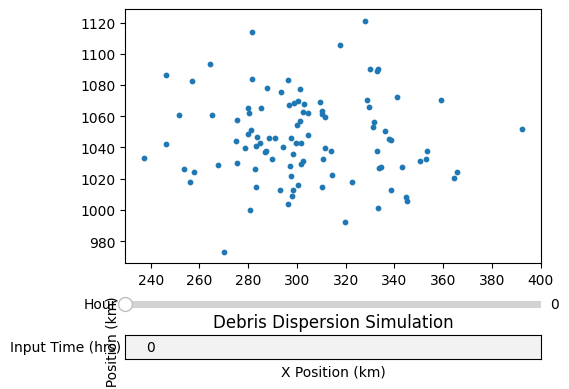

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider, TextBox
from matplotlib.animation import FuncAnimation

# Simulation parameters
num_particles = 100
simulation_time = 125  # hours
mean = np.array([300, 1050])  # Mean location in km
variance = 1000  # Variance for particles
width, height = 1000, 2000  # Dimensions of the grid

# Generate synthetic flow data
def generate_flow_data():
    time_points = np.array([0, 24, 48, 72, 96, 120])
    flow_x = np.array([0, 5, 0, -5, 0, 0])
    flow_y = np.array([0, 3, 6, 3, 0, -3])
    return time_points, flow_x, flow_y

# Interpolate flow data
def interpolate_flow(time_points, flow_x, flow_y, new_time_points):
    flow_x_interp = np.interp(new_time_points, time_points, flow_x, left=0, right=0)
    flow_y_interp = np.interp(new_time_points, time_points, flow_y, left=0, right=0)
    return flow_x_interp, flow_y_interp

# Initialize particles
particles = np.random.multivariate_normal(mean, np.diag([variance, variance]), num_particles)

# Generate and interpolate flow data
time_points, flow_x, flow_y = generate_flow_data()
new_time_points = np.arange(0, simulation_time + 1)  # Time points for interpolation
flow_x_pred, flow_y_pred = interpolate_flow(time_points, flow_x, flow_y, new_time_points)

# Create a figure and axes for the animation
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.35)
scatter = ax.scatter(particles[:, 0], particles[:, 1], s=10)

# Create a slider for animation
ax_slider = plt.axes([0.25, 0.25, 0.65, 0.03])
slider = Slider(ax_slider, 'Hour', 0, simulation_time, valinit=0, valstep=1)

# Create a text box for time input
ax_textbox = plt.axes([0.25, 0.15, 0.65, 0.05])
text_box = TextBox(ax_textbox, 'Input Time (hrs)', initial="0")

# Update the particle positions for each frame of the animation
def update_particles(t):
    if t < len(flow_x_pred):
        displacement = np.array([flow_x_pred[int(t)], flow_y_pred[int(t)]])
        new_positions = particles + displacement
        # Ensure particles stay within bounds
        new_positions = np.clip(new_positions, [0, 0], [width, height])
        return new_positions
    return particles

# Animation function
def animate(frame):
    new_positions = update_particles(frame)
    scatter.set_offsets(new_positions)
    return scatter,

# Update function for the slider
def update(val):
    t = slider.val
    animate(t)
    fig.canvas.draw_idle()

# Update function for the text box
def submit(text):
    try:
        t = float(text)
        if 0 <= t <= simulation_time:
            slider.set_val(t)
            animate(t)
            fig.canvas.draw_idle()
    except ValueError:
        pass  # Ignore invalid input

# Connect the slider and text box to their update functions
slider.on_changed(update)
text_box.on_submit(submit)

# Set up the animation
anim = FuncAnimation(fig, animate, frames=np.arange(0, simulation_time + 1), interval=200, blit=True)

# Plot labels
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Debris Dispersion Simulation")

plt.show()

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


IntSlider(value=0, continuous_update=False, description='Hour:', max=125)

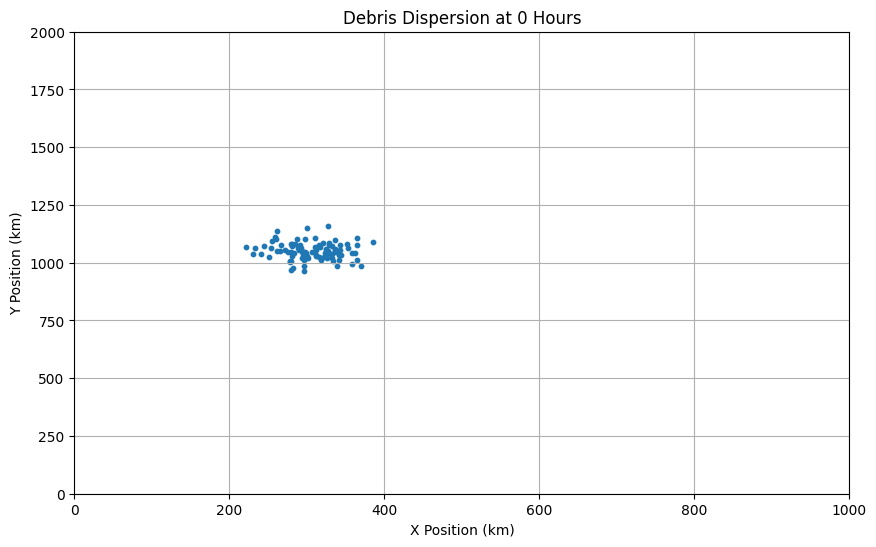

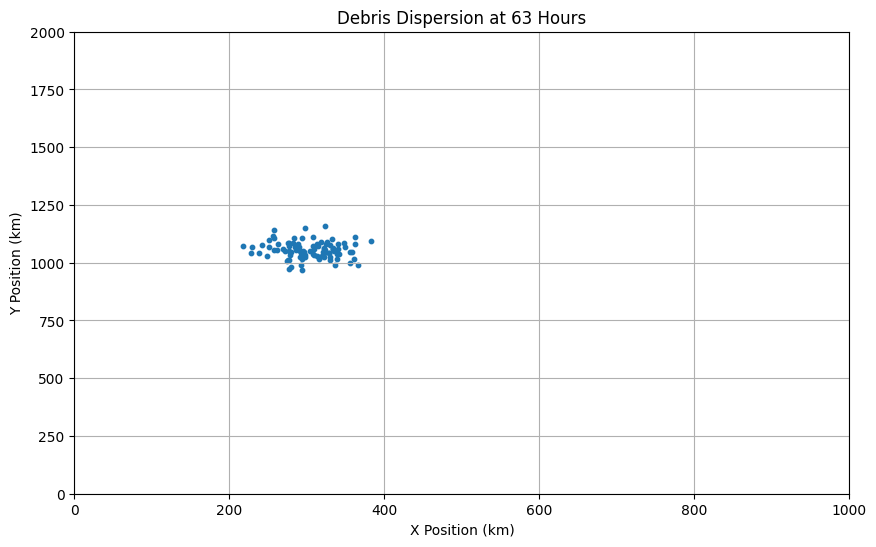

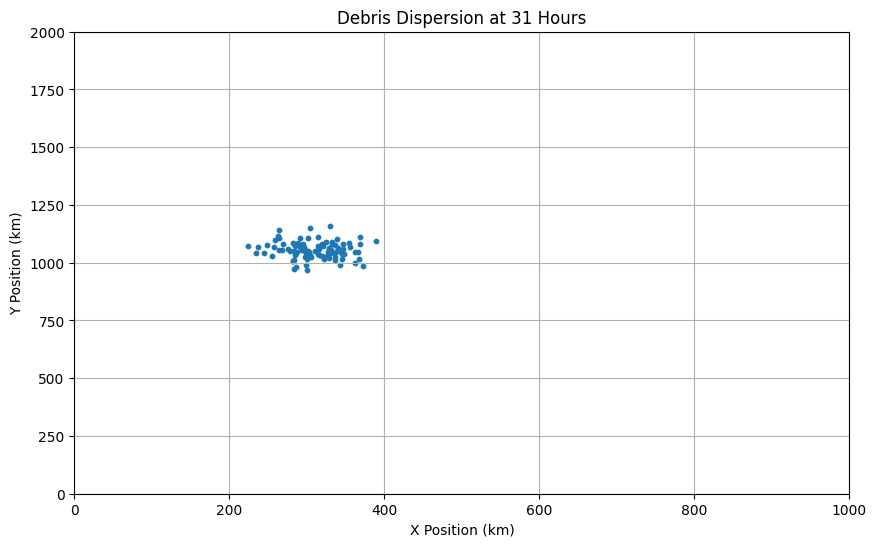

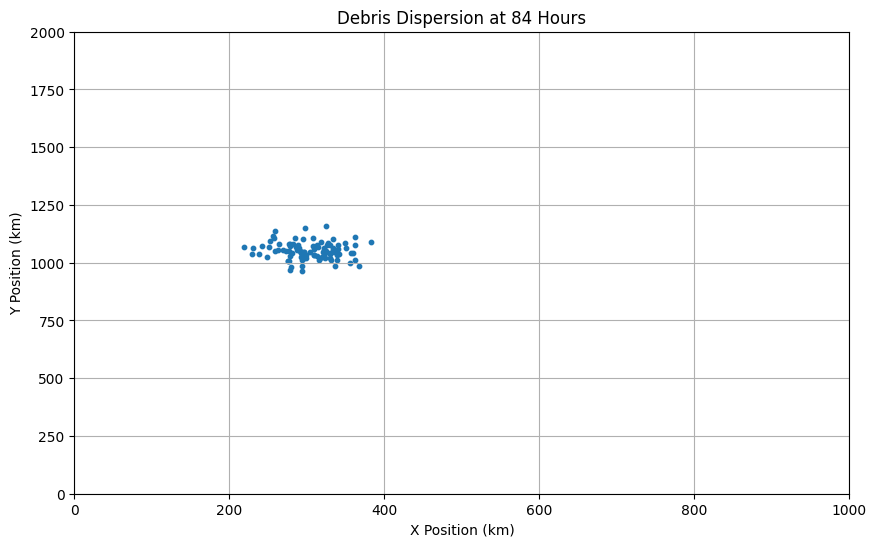

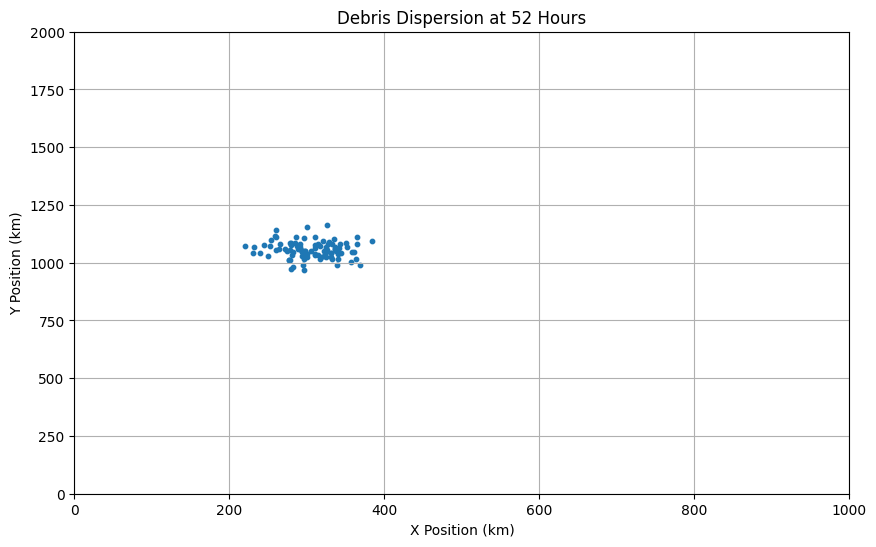

In [31]:
# Install necessary libraries
!pip install ipywidgets

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Simulation parameters
num_particles = 100
simulation_time = 125  # hours
mean = np.array([300, 1050])  # Mean location in km
variance = 1000  # Variance for particles
width, height = 1000, 2000  # Dimensions of the grid

# Generate synthetic flow data
def generate_flow_data():
    time_points = np.array([0, 24, 48, 72, 96, 120])
    flow_x = np.array([0, 5, 0, -5, 0, 0])
    flow_y = np.array([0, 3, 6, 3, 0, -3])
    return time_points, flow_x, flow_y

# Interpolate flow data
def interpolate_flow(time_points, flow_x, flow_y, new_time_points):
    flow_x_interp = np.interp(new_time_points, time_points, flow_x, left=0, right=0)
    flow_y_interp = np.interp(new_time_points, time_points, flow_y, left=0, right=0)
    return flow_x_interp, flow_y_interp

# Initialize particles
particles = np.random.multivariate_normal(mean, np.diag([variance, variance]), num_particles)

# Generate and interpolate flow data
time_points, flow_x, flow_y = generate_flow_data()
new_time_points = np.arange(0, simulation_time + 1)  # Time points for interpolation
flow_x_pred, flow_y_pred = interpolate_flow(time_points, flow_x, flow_y, new_time_points)

# Function to update particle positions
def update_particles(t):
    if t < len(flow_x_pred):
        displacement = np.array([flow_x_pred[int(t)], flow_y_pred[int(t)]])
        new_positions = particles + displacement
        # Ensure particles stay within bounds
        new_positions = np.clip(new_positions, [0, 0], [width, height])
        return new_positions
    return particles

# Function to plot particles at a specific time
def plot_particles(t):
    new_positions = update_particles(t)
    plt.figure(figsize=(10, 6))
    plt.scatter(new_positions[:, 0], new_positions[:, 1], s=10)
    plt.xlim(0, width)
    plt.ylim(0, height)
    plt.xlabel("X Position (km)")
    plt.ylabel("Y Position (km)")
    plt.title(f"Debris Dispersion at {t} Hours")
    plt.grid(True)
    plt.show()

# Create slider widget
slider = widgets.IntSlider(value=0, min=0, max=simulation_time, step=1, description='Hour:', continuous_update=False)

# Display slider and plot
def update_plot(change):
    plot_particles(slider.value)

slider.observe(update_plot, names='value')
display(slider)

# Initial plot
plot_particles(slider.value)


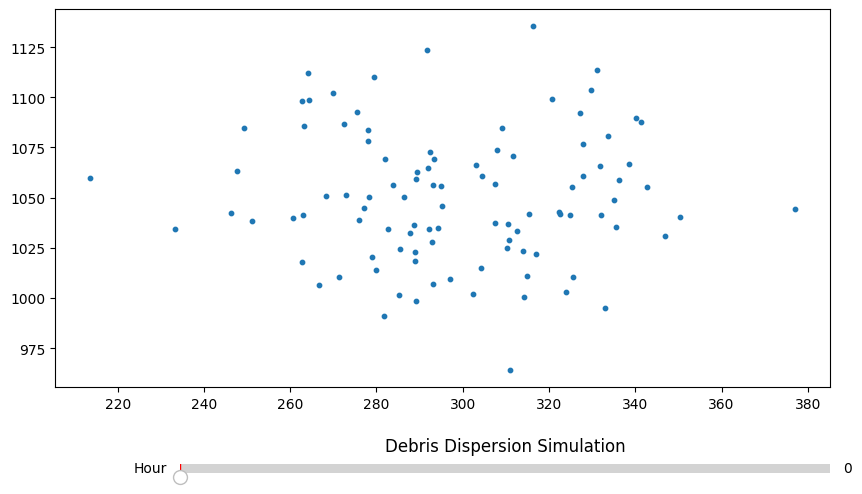

In [32]:
# prompt: trouble shoot the above animation, want result of only one screen with the slider to control placement

import matplotlib.pyplot as plt
import numpy as np
# Simulation parameters
num_particles = 100
simulation_time = 125  # hours
mean = np.array([300, 1050])  # Mean location in km
variance = 1000  # Variance for particles
width, height = 1000, 2000  # Dimensions of the grid

# Generate synthetic flow data (example)
def generate_flow_data():
  time_points = np.array([0, 24, 48, 72, 96, 120])
  flow_x = np.array([0, 5, 0, -5, 0, 0])
  flow_y = np.array([0, 3, 6, 3, 0, -3])
  return time_points, flow_x, flow_y

# Interpolate flow data
def interpolate_flow(time_points, flow_x, flow_y, new_time_points):
  flow_x_interp = np.interp(new_time_points, time_points, flow_x, left=0, right=0)
  flow_y_interp = np.interp(new_time_points, time_points, flow_y, left=0, right=0)
  return flow_x_interp, flow_y_interp

# Initialize particles
particles = np.random.multivariate_normal(mean, np.diag([variance, variance]), num_particles)

# Generate and interpolate flow data
time_points, flow_x, flow_y = generate_flow_data()
new_time_points = np.arange(0, simulation_time + 1)
flow_x_pred, flow_y_pred = interpolate_flow(time_points, flow_x, flow_y, new_time_points)

# Create a figure and axes for the animation
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(bottom=0.25)
scatter = ax.scatter(particles[:, 0], particles[:, 1], s=10)

# Create a slider
ax_slider = plt.axes([0.25, 0.1, 0.65, 0.03])
slider = Slider(ax_slider, 'Hour', 0, simulation_time, valinit=0, valstep=1)

# Function to update particle positions
def update_particles(t):
  if t < len(flow_x_pred):
    displacement = np.array([flow_x_pred[int(t)], flow_y_pred[int(t)]])
    new_positions = particles + displacement
    new_positions = np.clip(new_positions, [0, 0], [width, height])
    return new_positions
  return particles

# Function to update the plot
def update(val):
  current_hour = int(slider.val)
  new_positions = update_particles(current_hour)
  scatter.set_offsets(new_positions)
  fig.canvas.draw_idle()

# Connect the slider to the update function
slider.on_changed(update)

plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Debris Dispersion Simulation")
plt.xlim(0, width)
plt.ylim(0, height)
plt.grid(True)
plt.show()


BoundedIntText(value=0, description='Hour:', max=125)

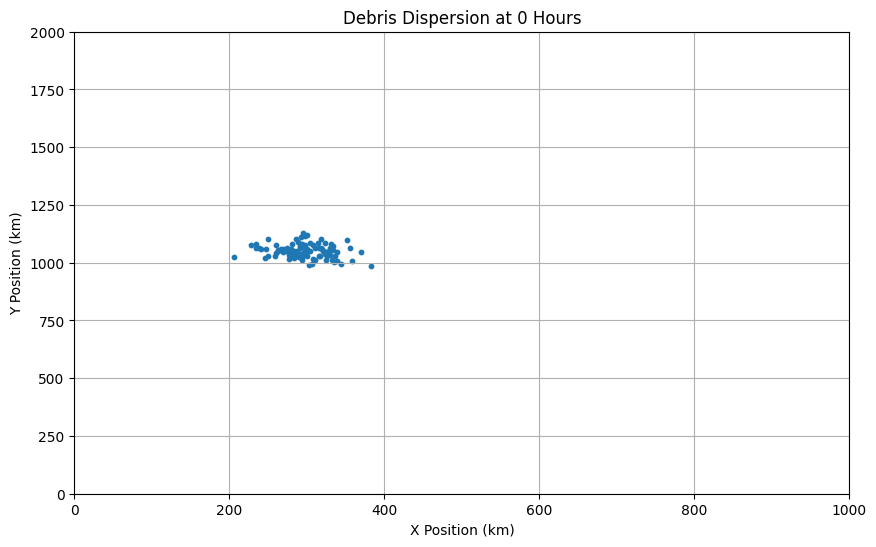

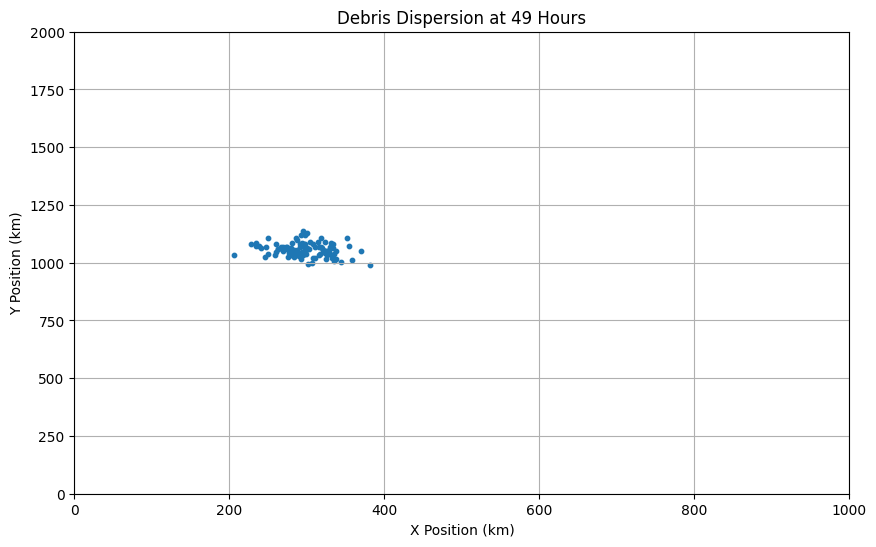

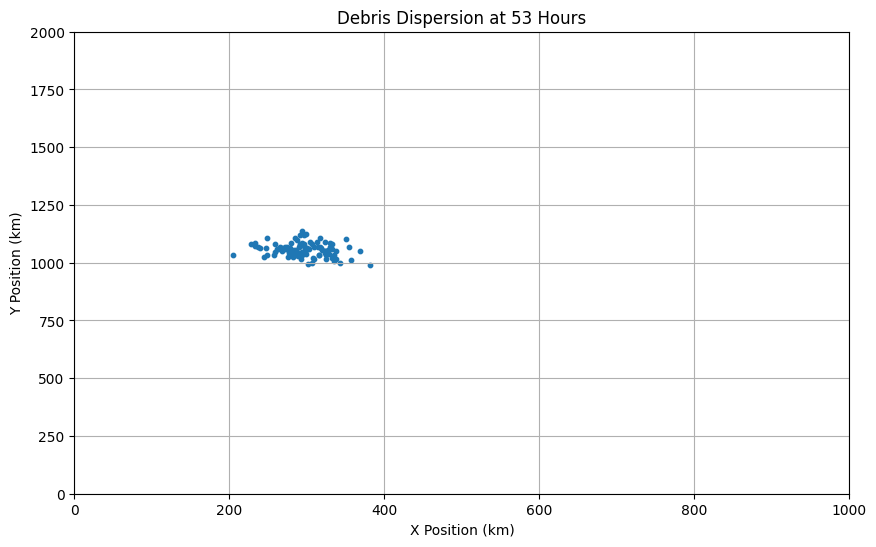

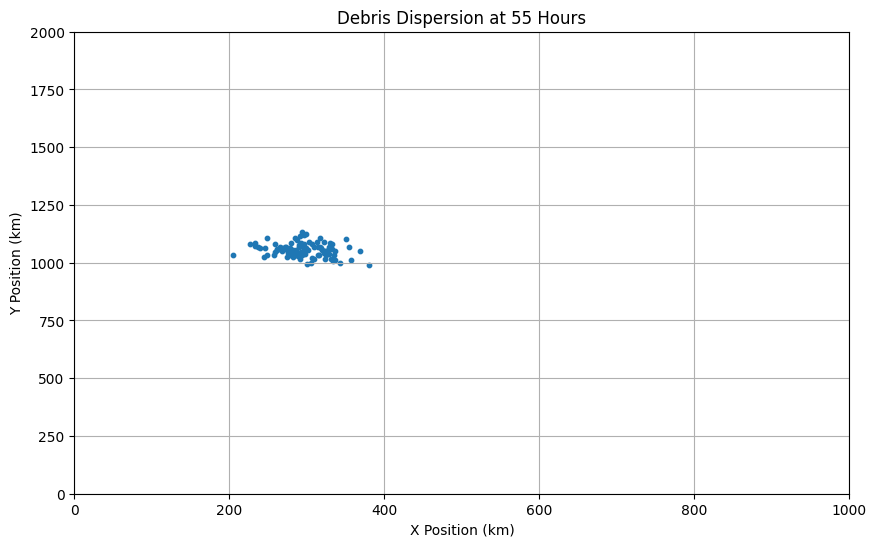

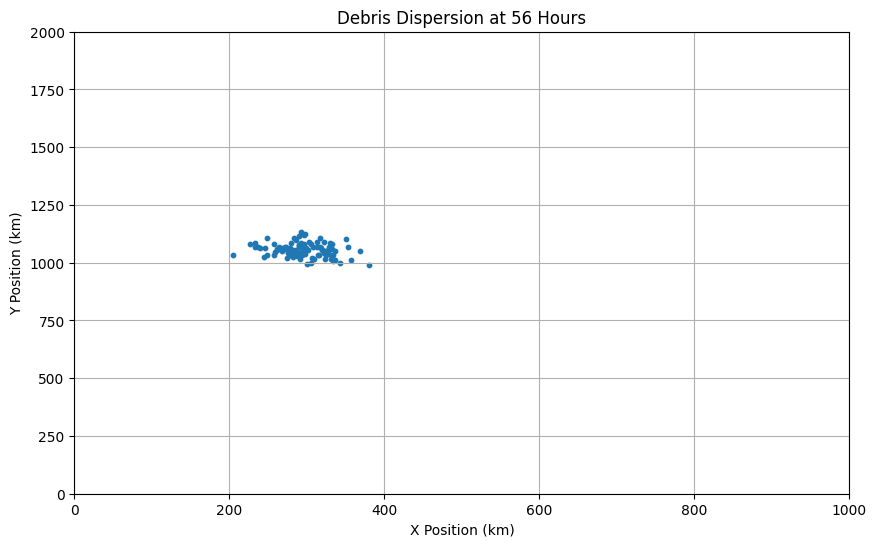

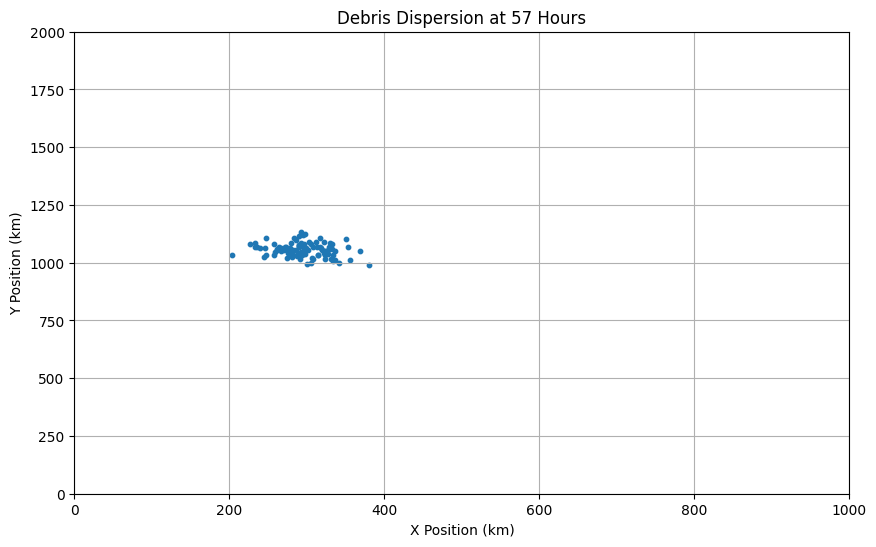

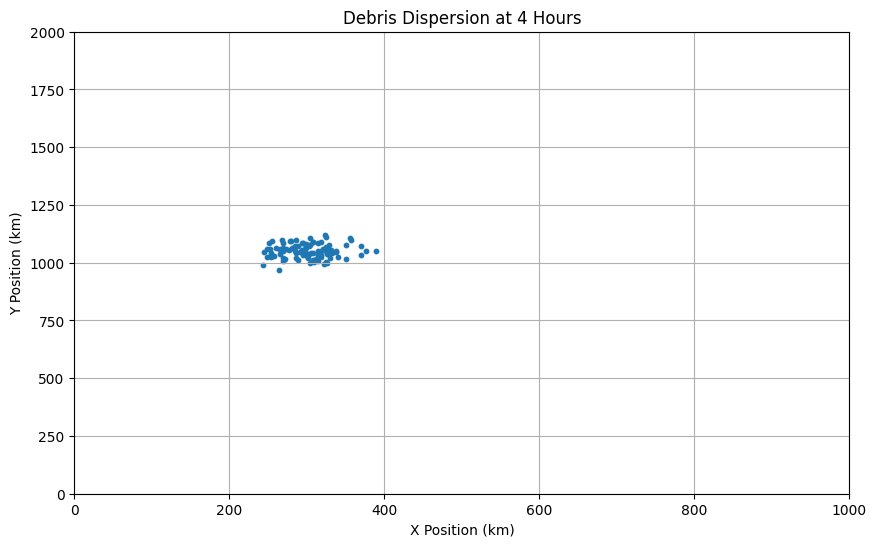

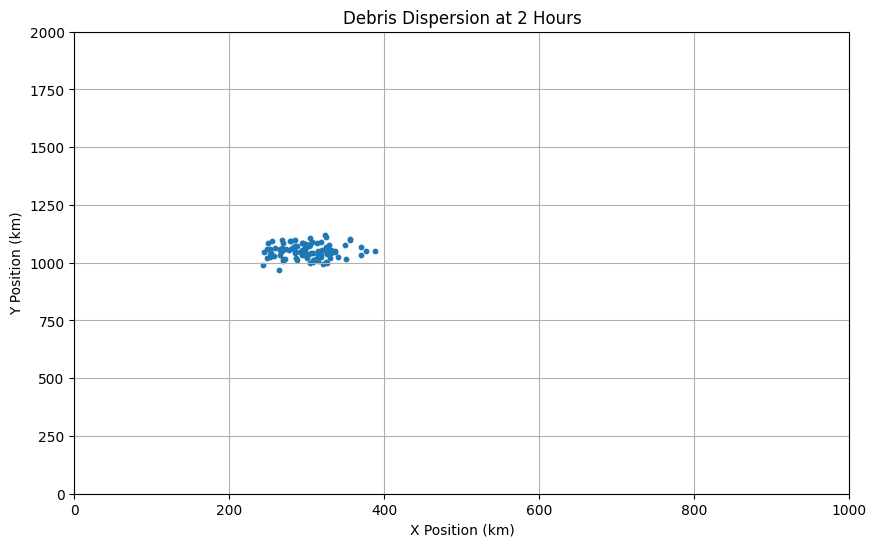

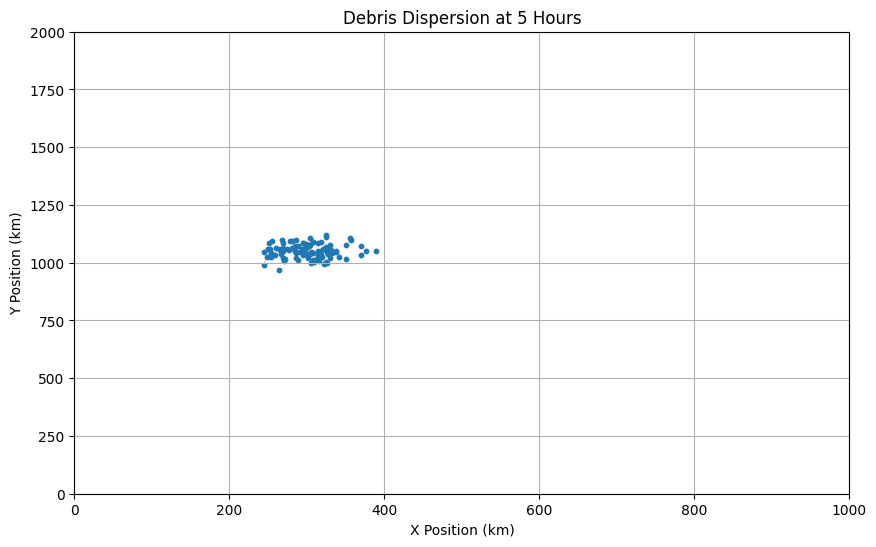

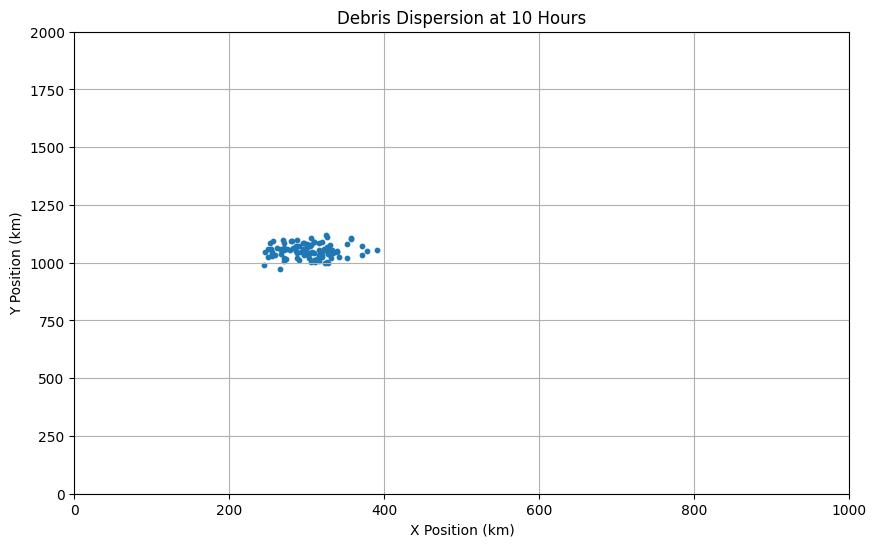

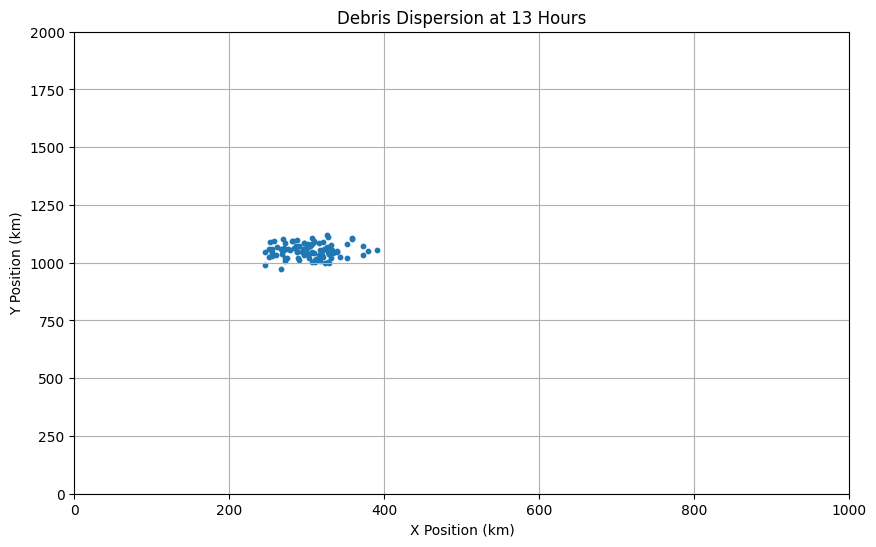

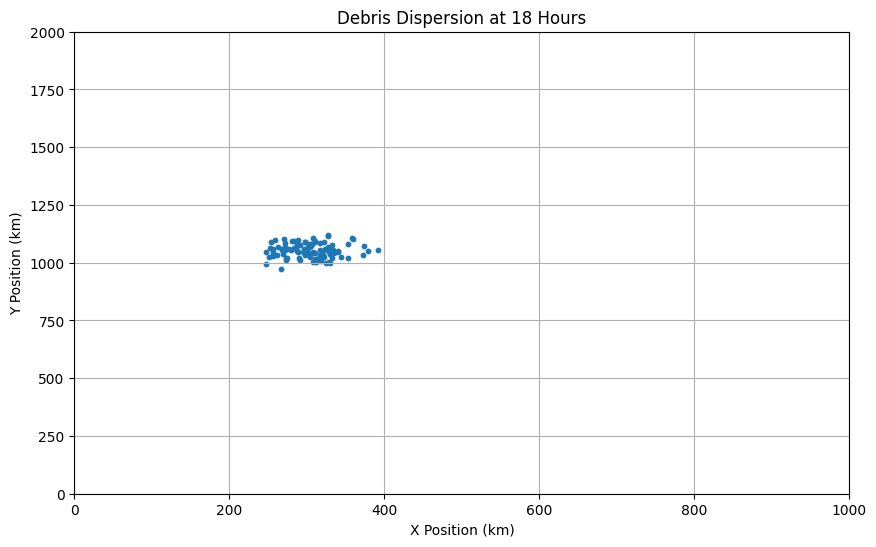

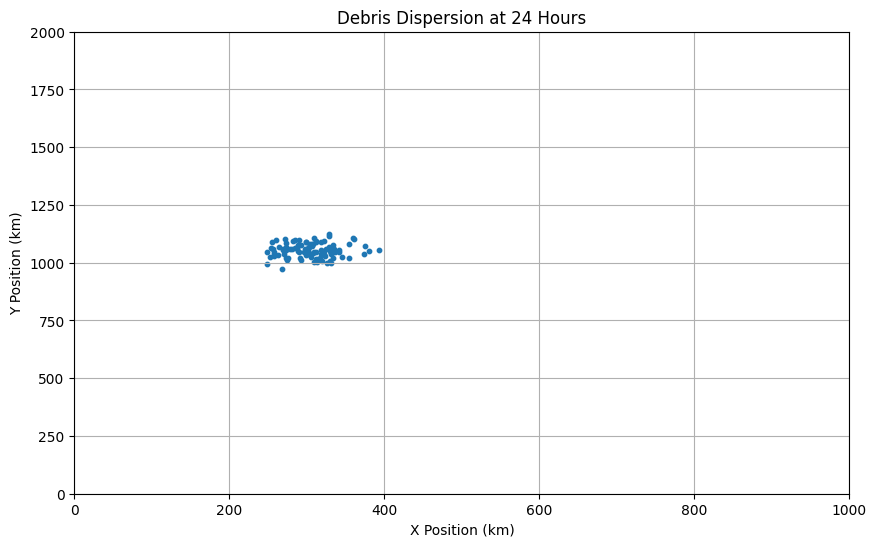

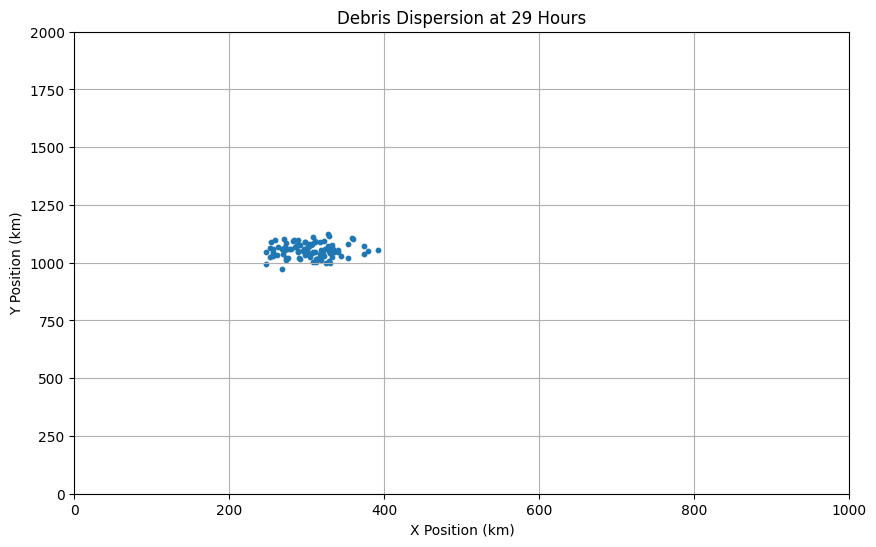

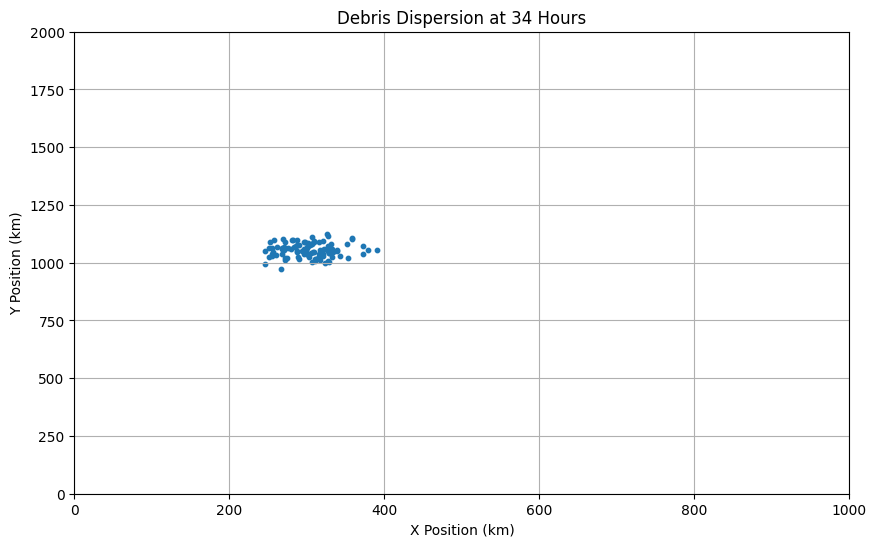

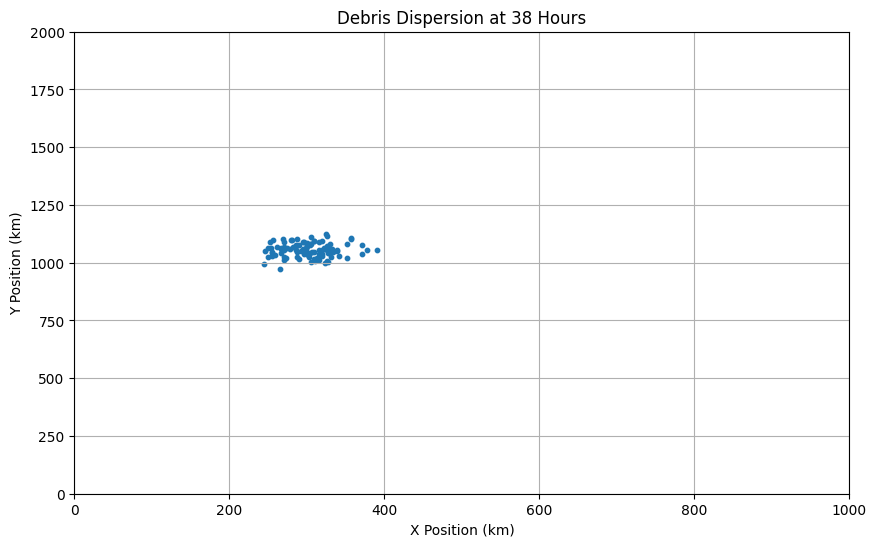

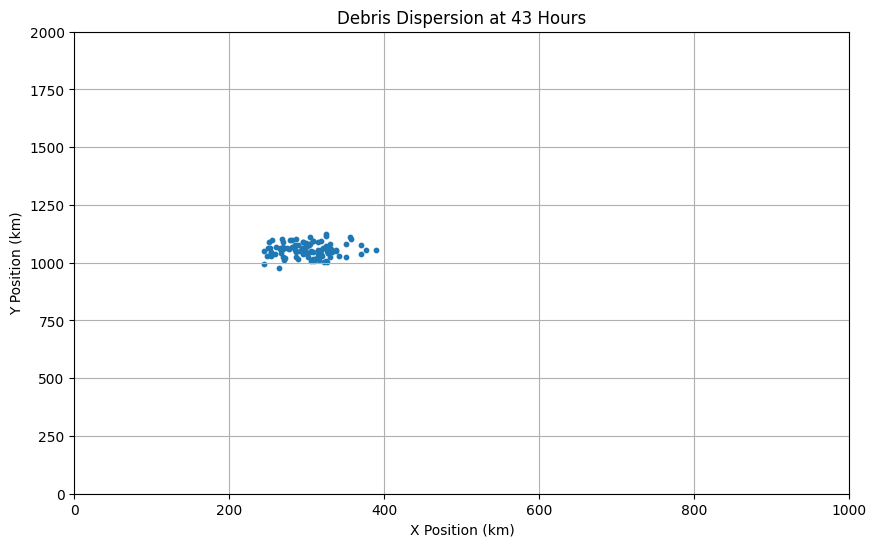

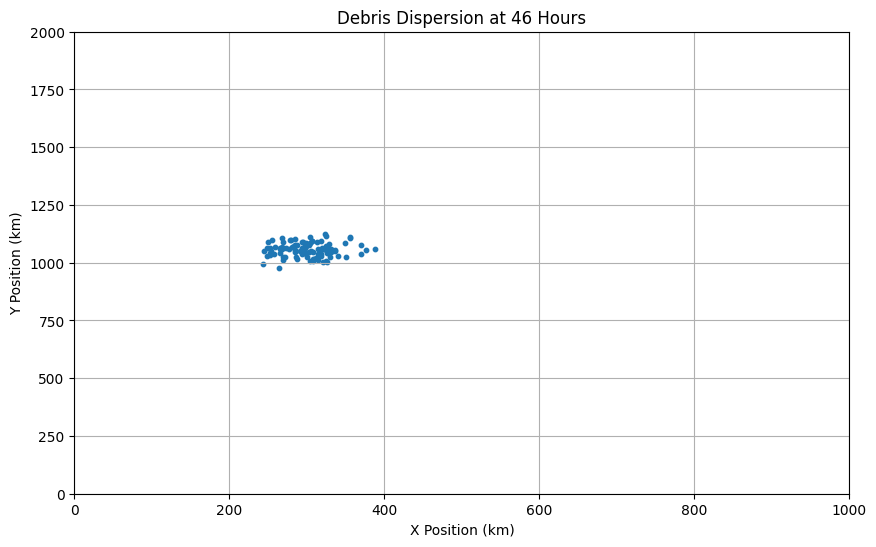

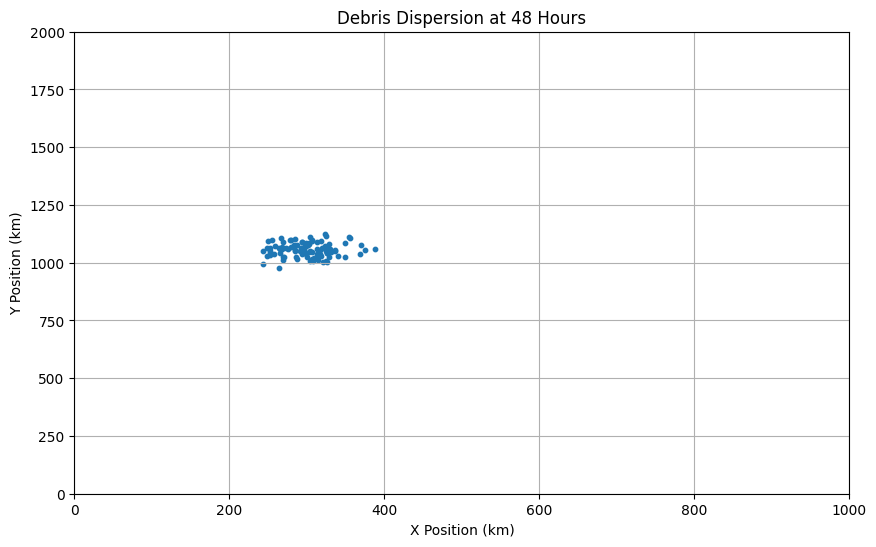

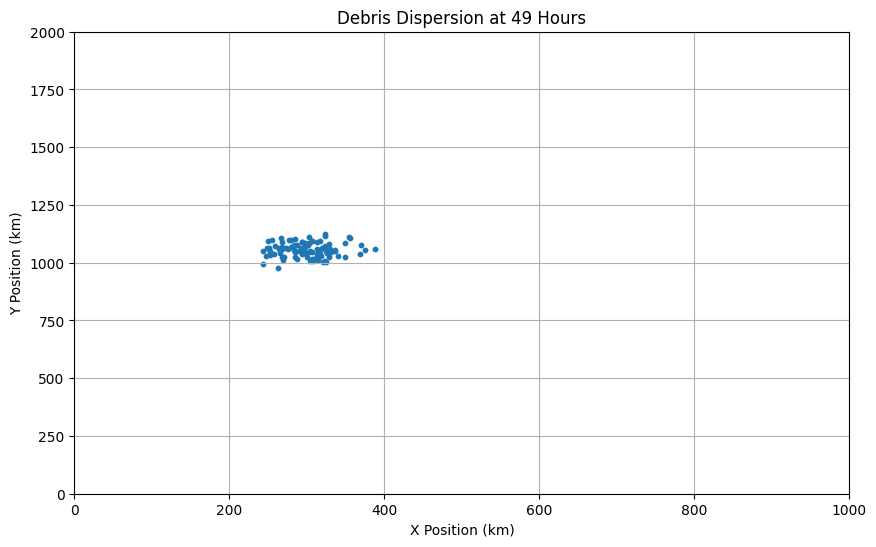

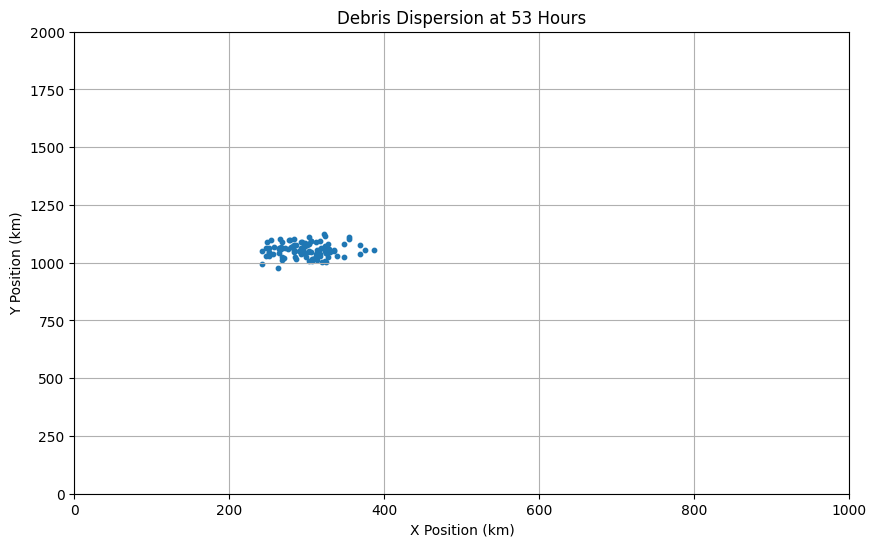

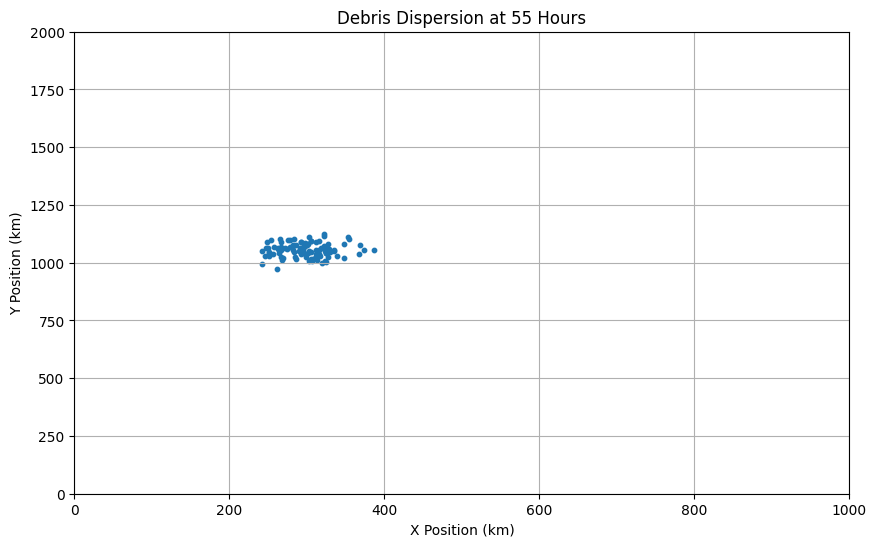

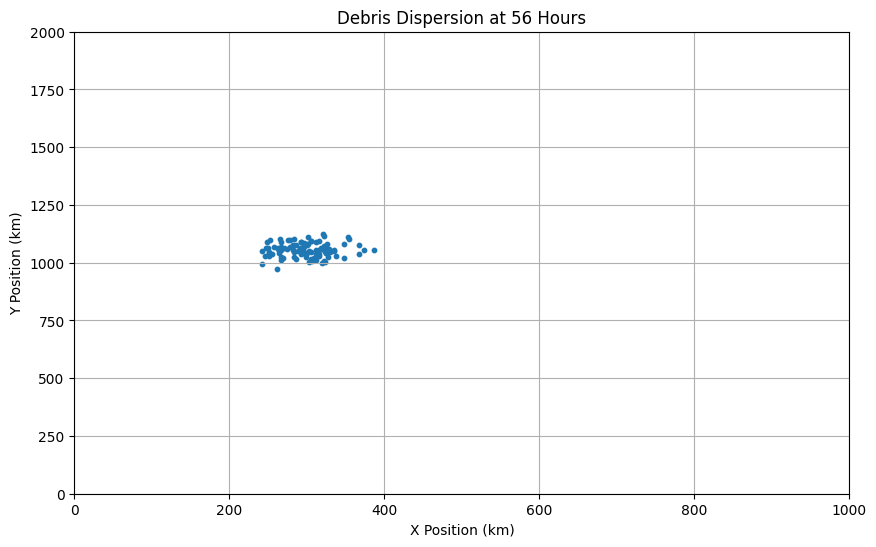

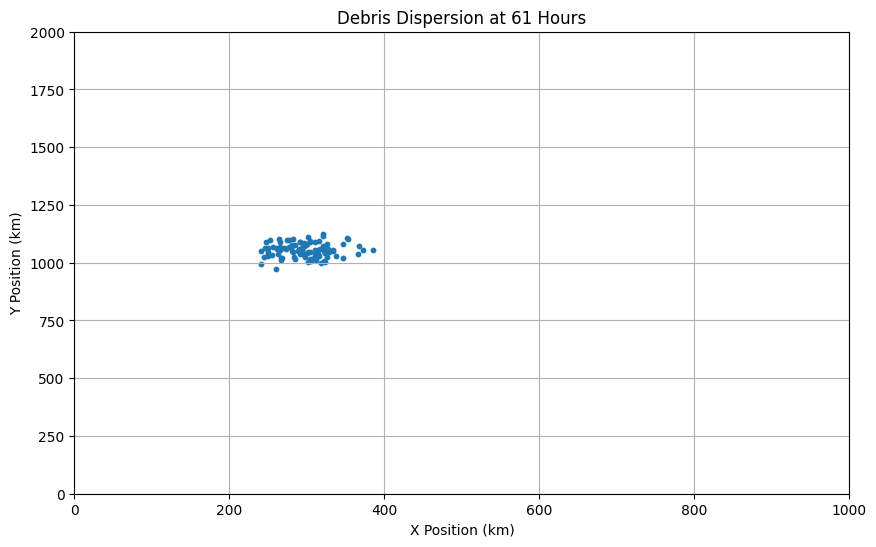

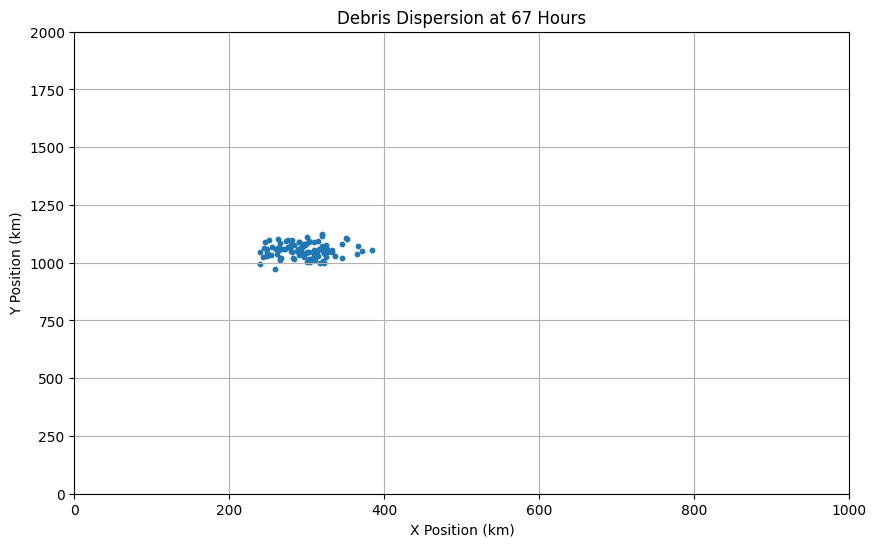

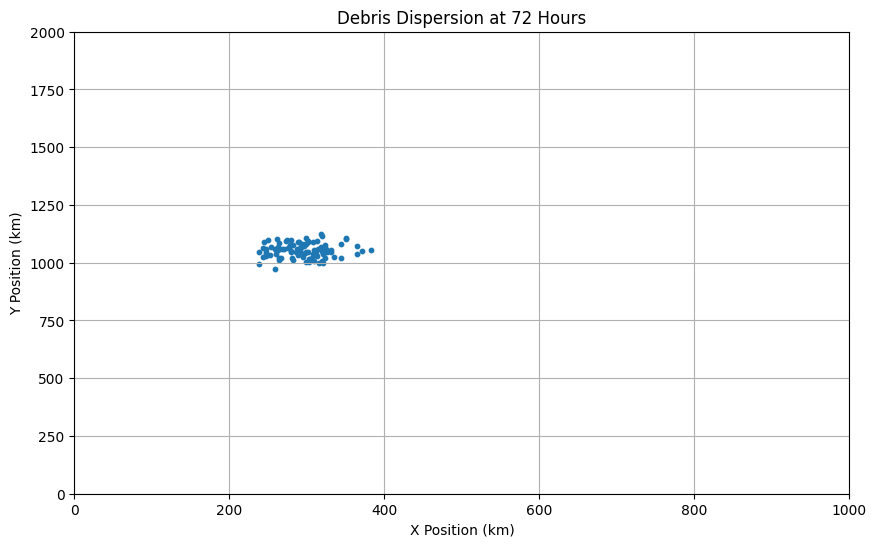

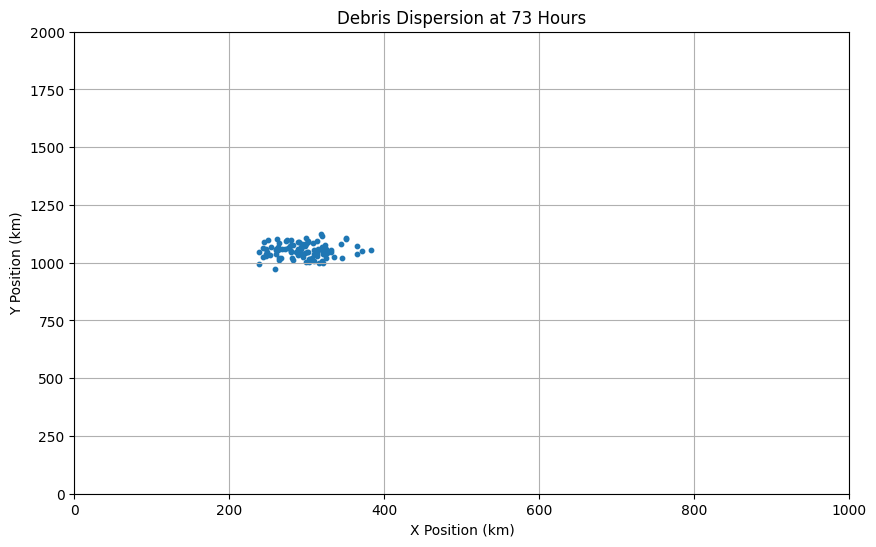

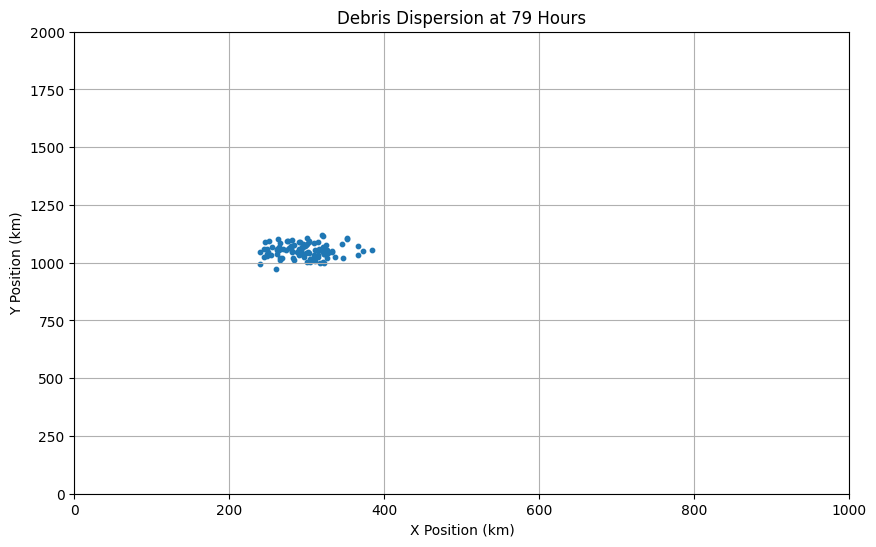

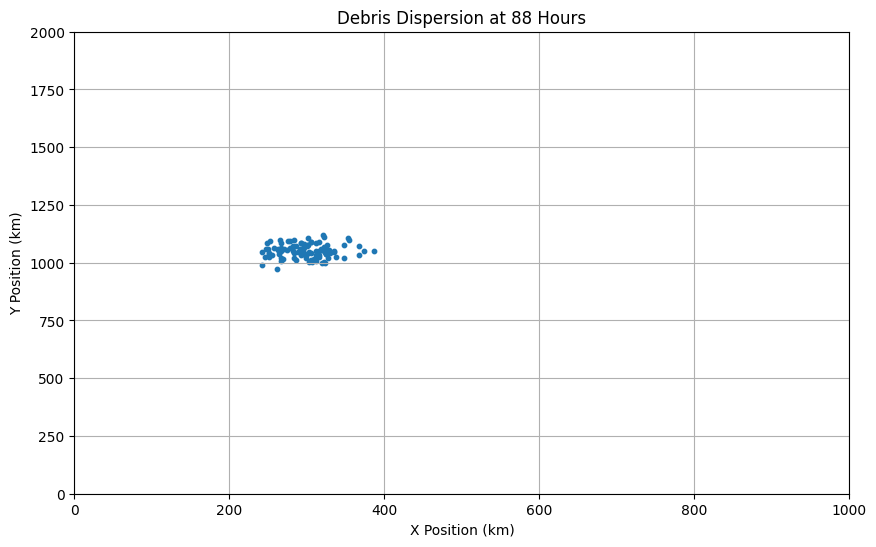

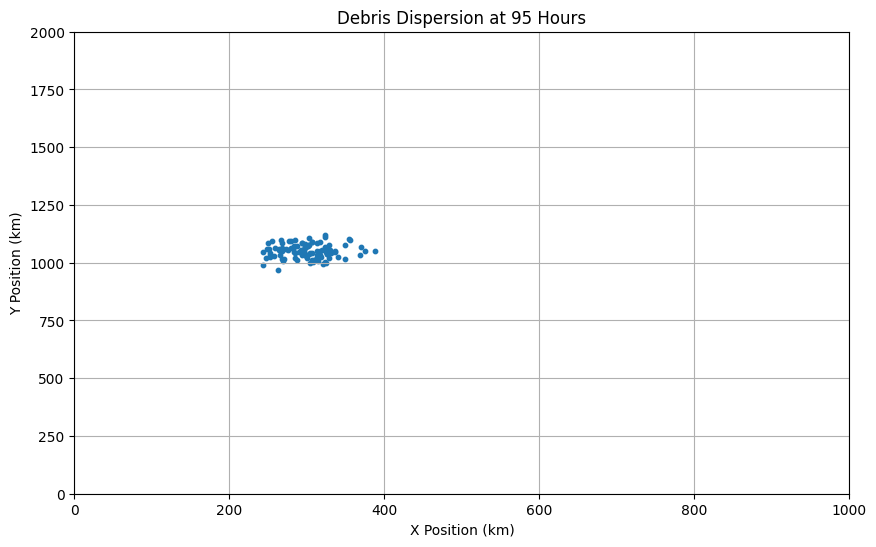

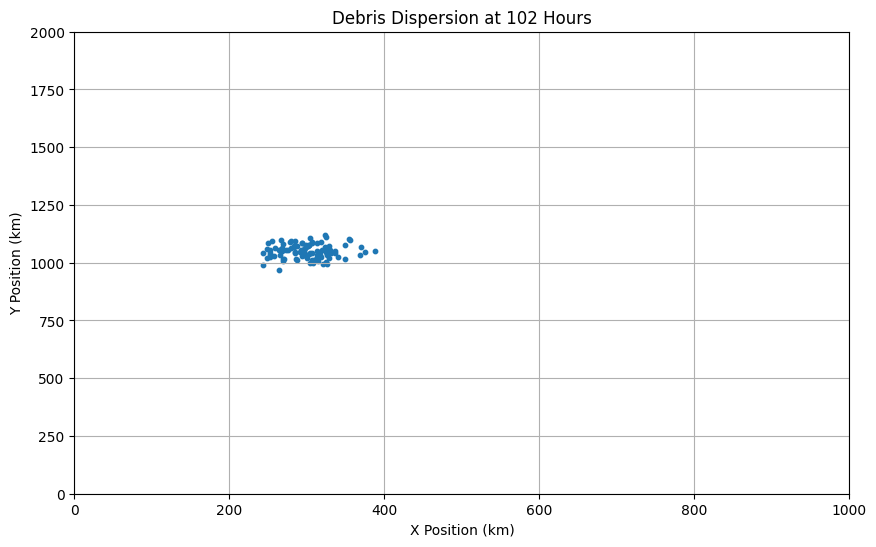

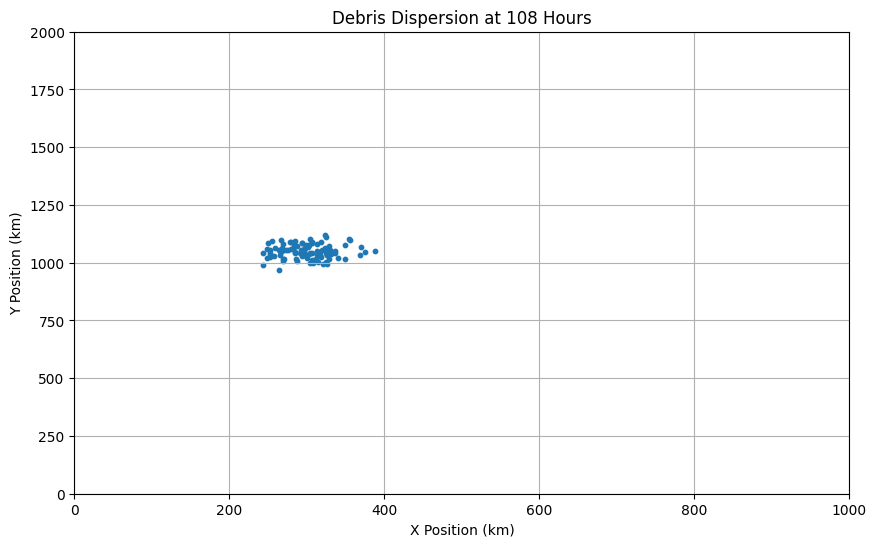

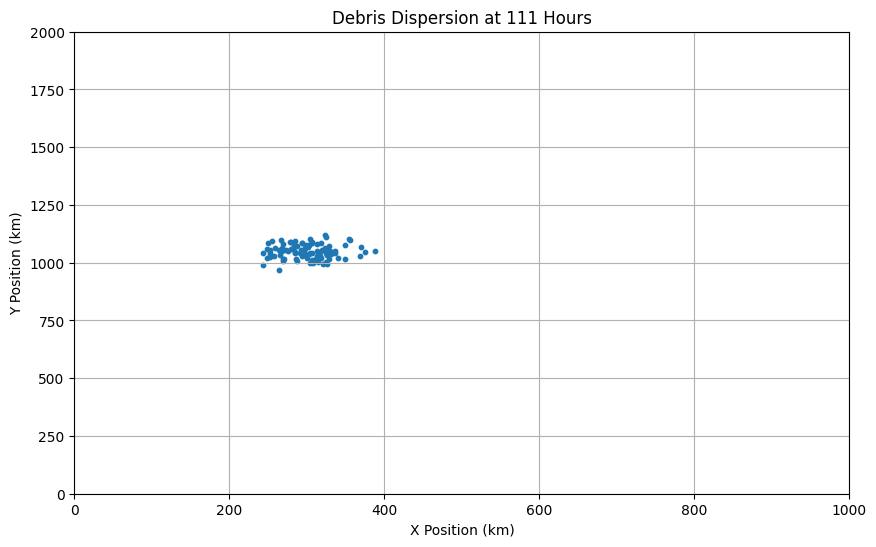

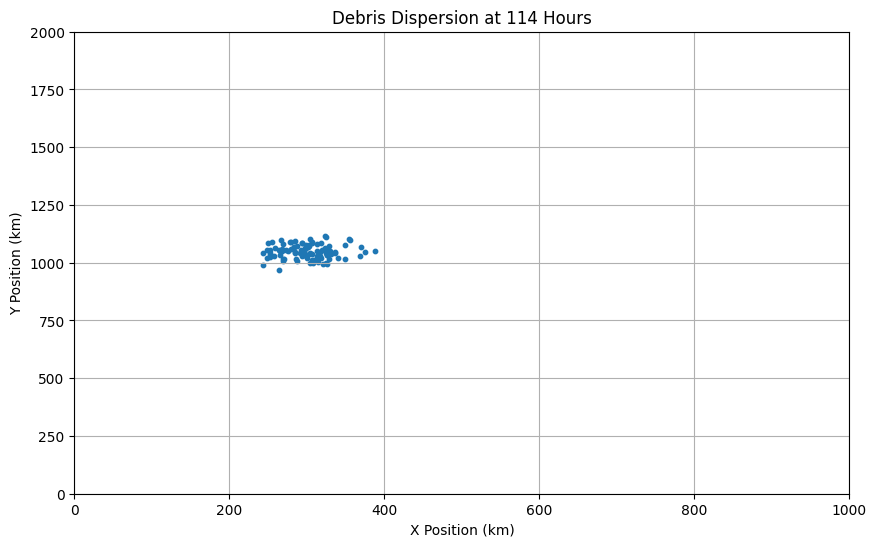

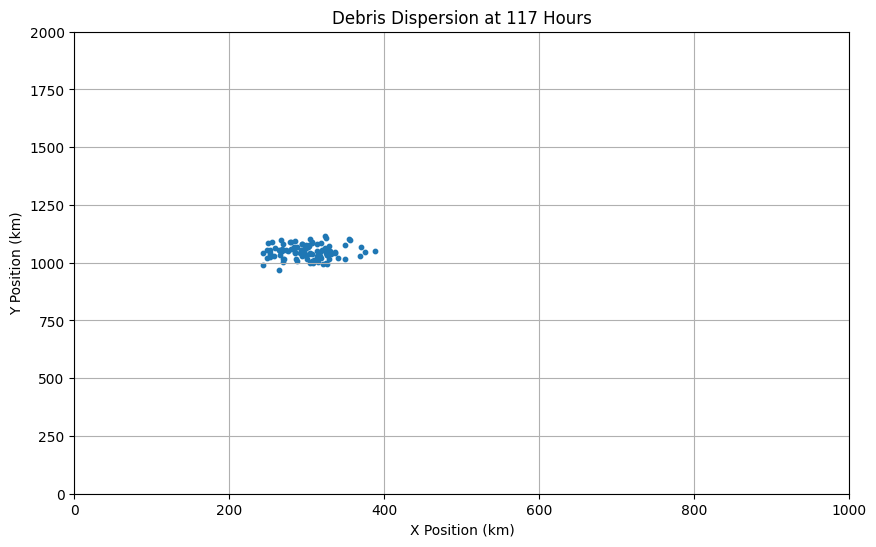

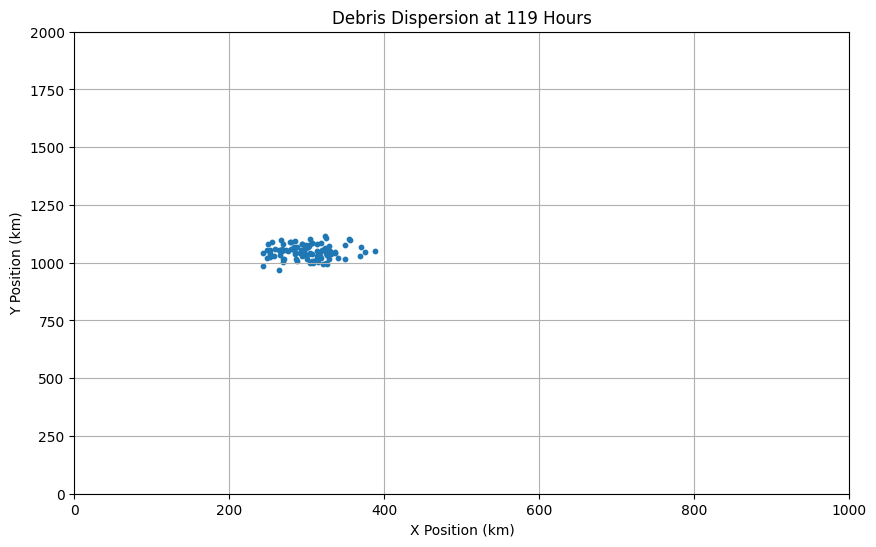

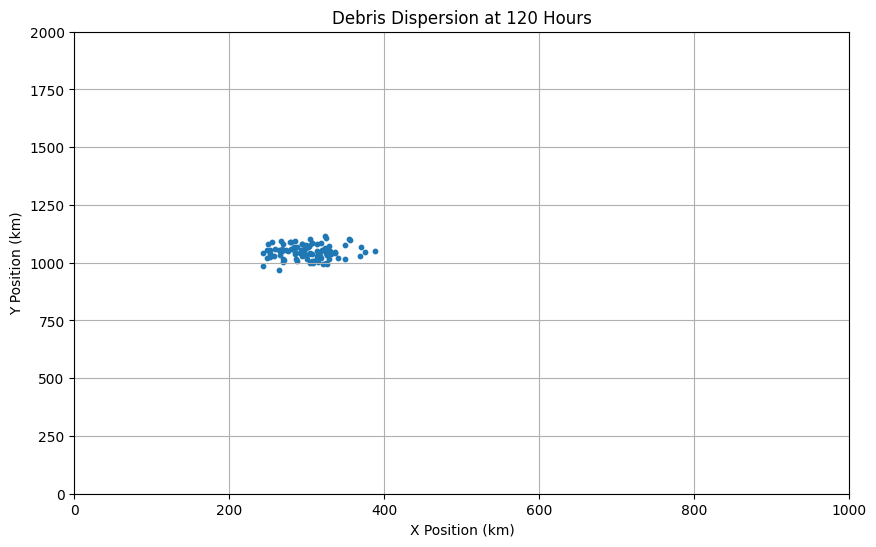

In [33]:
# prompt: not working, try again? this time an input box rather than slider

import matplotlib.pyplot as plt
import numpy as np
# Simulation parameters
num_particles = 100
simulation_time = 125  # hours
mean = np.array([300, 1050])  # Mean location in km
variance = 1000  # Variance for particles
width, height = 1000, 2000  # Dimensions of the grid

# Generate synthetic flow data (example)
def generate_flow_data():
  time_points = np.array([0, 24, 48, 72, 96, 120])
  flow_x = np.array([0, 5, 0, -5, 0, 0])
  flow_y = np.array([0, 3, 6, 3, 0, -3])
  return time_points, flow_x, flow_y

# Interpolate flow data
def interpolate_flow(time_points, flow_x, flow_y, new_time_points):
  flow_x_interp = np.interp(new_time_points, time_points, flow_x, left=0, right=0)
  flow_y_interp = np.interp(new_time_points, time_points, flow_y, left=0, right=0)
  return flow_x_interp, flow_y_interp

# Initialize particles
particles = np.random.multivariate_normal(mean, np.diag([variance, variance]), num_particles)

# Generate and interpolate flow data
time_points, flow_x, flow_y = generate_flow_data()
new_time_points = np.arange(0, simulation_time + 1)
flow_x_pred, flow_y_pred = interpolate_flow(time_points, flow_x, flow_y, new_time_points)

# Function to update particle positions
def update_particles(t):
  if t < len(flow_x_pred):
    displacement = np.array([flow_x_pred[int(t)], flow_y_pred[int(t)]])
    new_positions = particles + displacement
    new_positions = np.clip(new_positions, [0, 0], [width, height])
    return new_positions
  return particles

# Function to plot particles at a specific time
def plot_particles(t):
  new_positions = update_particles(t)
  plt.figure(figsize=(10, 6))
  plt.scatter(new_positions[:, 0], new_positions[:, 1], s=10)
  plt.xlim(0, width)
  plt.ylim(0, height)
  plt.xlabel("X Position (km)")
  plt.ylabel("Y Position (km)")
  plt.title(f"Debris Dispersion at {t} Hours")
  plt.grid(True)
  plt.show()

# Create input widget
text_input = widgets.BoundedIntText(
    value=0,
    min=0,
    max=simulation_time,
    step=1,
    description='Hour:',
    disabled=False
)

# Display input and plot
def update_plot(change):
    plot_particles(text_input.value)

text_input.observe(update_plot, names='value')
display(text_input)

# Initial plot
plot_particles(text_input.value)


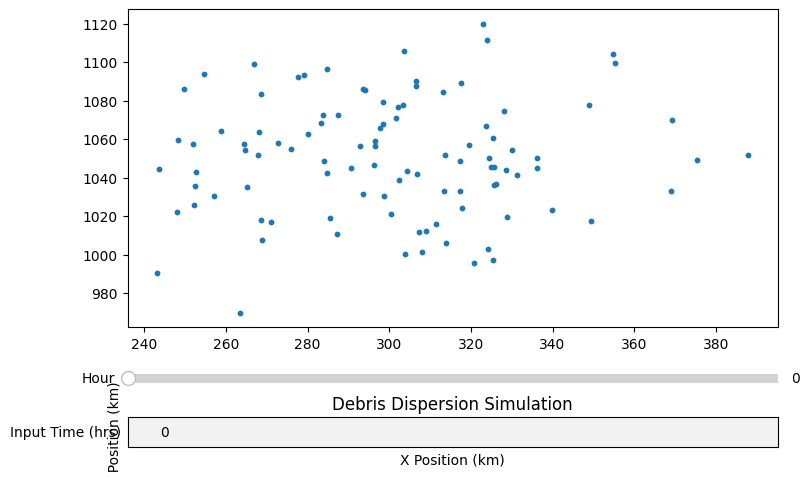

In [34]:
# prompt: it is not animated

import matplotlib.pyplot as plt
import numpy as np
# Simulation parameters
num_particles = 100
simulation_time = 125  # hours
mean = np.array([300, 1050])  # Mean location in km
variance = 1000  # Variance for particles
width, height = 1000, 2000  # Dimensions of the grid

# Generate synthetic flow data (example)
def generate_flow_data():
  time_points = np.array([0, 24, 48, 72, 96, 120])
  flow_x = np.array([0, 5, 0, -5, 0, 0])
  flow_y = np.array([0, 3, 6, 3, 0, -3])
  return time_points, flow_x, flow_y

# Interpolate flow data
def interpolate_flow(time_points, flow_x, flow_y, new_time_points):
  flow_x_interp = np.interp(new_time_points, time_points, flow_x, left=0, right=0)
  flow_y_interp = np.interp(new_time_points, time_points, flow_y, left=0, right=0)
  return flow_x_interp, flow_y_interp

# Initialize particles
particles = np.random.multivariate_normal(mean, np.diag([variance, variance]), num_particles)

# Generate and interpolate flow data
time_points, flow_x, flow_y = generate_flow_data()
new_time_points = np.arange(0, simulation_time + 1)
flow_x_pred, flow_y_pred = interpolate_flow(time_points, flow_x, flow_y, new_time_points)

# Create a figure and axes for the animation
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(left=0.25, bottom=0.35)
scatter = ax.scatter(particles[:, 0], particles[:, 1], s=10)

# Create a slider for animation
ax_slider = plt.axes([0.25, 0.25, 0.65, 0.03])
slider = Slider(ax_slider, 'Hour', 0, simulation_time, valinit=0, valstep=1)

# Create a text box for time input
ax_textbox = plt.axes([0.25, 0.15, 0.65, 0.05])
text_box = TextBox(ax_textbox, 'Input Time (hrs)', initial="0")

# Update the particle positions for each frame of the animation
def update_particles(t):
  if t < len(flow_x_pred):
    displacement = np.array([flow_x_pred[int(t)], flow_y_pred[int(t)]])
    new_positions = particles + displacement
    # Ensure particles stay within bounds
    new_positions = np.clip(new_positions, [0, 0], [width, height])
    return new_positions
  return particles

# Animation function
def animate(frame):
  new_positions = update_particles(frame)
  scatter.set_offsets(new_positions)
  return scatter,

# Update function for the slider
def update(val):
  t = slider.val
  animate(t)
  fig.canvas.draw_idle()

# Update function for the text box
def submit(text):
  try:
    t = float(text)
    if 0 <= t <= simulation_time:
      slider.set_val(t)
      animate(t)
      fig.canvas.draw_idle()
  except ValueError:
    pass  # Ignore invalid input

# Connect the slider and text box to their update functions
slider.on_changed(update)
text_box.on_submit(submit)

# Set up the animation
anim = FuncAnimation(fig, animate, frames=np.arange(0, simulation_time + 1), interval=200, blit=True)

# Plot labels
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Debris Dispersion Simulation")

plt.show()


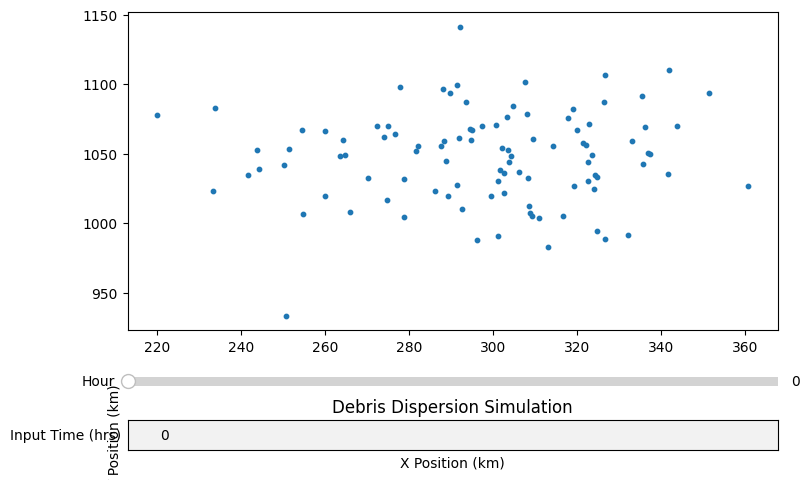

In [35]:
# prompt: the particles are not moving

import matplotlib.pyplot as plt
import numpy as np
# Simulation parameters
num_particles = 100
simulation_time = 125  # hours
mean = np.array([300, 1050])  # Mean location in km
variance = 1000  # Variance for particles
width, height = 1000, 2000  # Dimensions of the grid

# Generate synthetic flow data (example)
def generate_flow_data():
  time_points = np.array([0, 24, 48, 72, 96, 120])
  flow_x = np.array([0, 5, 0, -5, 0, 0])
  flow_y = np.array([0, 3, 6, 3, 0, -3])
  return time_points, flow_x, flow_y

# Interpolate flow data
def interpolate_flow(time_points, flow_x, flow_y, new_time_points):
  flow_x_interp = np.interp(new_time_points, time_points, flow_x, left=0, right=0)
  flow_y_interp = np.interp(new_time_points, time_points, flow_y, left=0, right=0)
  return flow_x_interp, flow_y_interp

# Initialize particles
particles = np.random.multivariate_normal(mean, np.diag([variance, variance]), num_particles)

# Generate and interpolate flow data
time_points, flow_x, flow_y = generate_flow_data()
new_time_points = np.arange(0, simulation_time + 1)
flow_x_pred, flow_y_pred = interpolate_flow(time_points, flow_x, flow_y, new_time_points)

# Create a figure and axes for the animation
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(left=0.25, bottom=0.35)
scatter = ax.scatter(particles[:, 0], particles[:, 1], s=10)

# Create a slider for animation
ax_slider = plt.axes([0.25, 0.25, 0.65, 0.03])
slider = Slider(ax_slider, 'Hour', 0, simulation_time, valinit=0, valstep=1)

# Create a text box for time input
ax_textbox = plt.axes([0.25, 0.15, 0.65, 0.05])
text_box = TextBox(ax_textbox, 'Input Time (hrs)', initial="0")

# Update the particle positions for each frame of the animation
def update_particles(t):
  if t < len(flow_x_pred):
    displacement = np.array([flow_x_pred[int(t)], flow_y_pred[int(t)]])
    new_positions = particles + displacement
    # Ensure particles stay within bounds
    new_positions = np.clip(new_positions, [0, 0], [width, height])
    particles[:, 0] = new_positions[:, 0] # Update the original particles array
    particles[:, 1] = new_positions[:, 1]
    return new_positions
  return particles

# Animation function
def animate(frame):
  new_positions = update_particles(frame)
  scatter.set_offsets(new_positions)
  return scatter,

# Update function for the slider
def update(val):
  t = slider.val
  animate(t)
  fig.canvas.draw_idle()

# Update function for the text box
def submit(text):
  try:
    t = float(text)
    if 0 <= t <= simulation_time:
      slider.set_val(t)
      animate(t)
      fig.canvas.draw_idle()
  except ValueError:
    pass  # Ignore invalid input

# Connect the slider and text box to their update functions
slider.on_changed(update)
text_box.on_submit(submit)

# Set up the animation
anim = FuncAnimation(fig, animate, frames=np.arange(0, simulation_time + 1), interval=200, blit=True)

# Plot labels
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Debris Dispersion Simulation")

plt.show()
